# 2017 장애인 실태조사 지체장애 건강관리의사 필요 및 건강수준 향상을 위한 서비스 개선 사항

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-whitegrid')
plt.rc('font', family = 'Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

In [2]:
# 원본 데이터 불러오기
raw_df = pd.read_excel('pydata/2017 장애인실태조사_뇌병변장애.xlsx', sheet_name = 1)
len(raw_df)

# 지체장애인만 불러오기
df = raw_df[raw_df['지체장애여부']==1]
df.head()

,조사표 종류,가구원 일련번호(장애인),가구원 일련번호(응답자),조사지역(시도),응답자 유형,대리응답이유,장애유형확인1,장애유형확인2,장애유형확인3,개인번호,...,"보육,교육비","보호,간병비",재활기관이용료,통신비,"장애인보조기기 구입,유지비",부모사후 및 노후대비비,기타.4,월평균 총 추가비용,wg_p,ws_p
0,2,1,1,21,NaN,NaN,1,NaN,NaN,1,...,0,0,0,0,0,0,0,0,444.377794,1.13207
1,2,1,1,21,NaN,NaN,1,NaN,NaN,1,...,0,0,0,0,0,0,0,0,444.377794,1.13207
2,2,1,1,21,NaN,NaN,1,NaN,NaN,1,...,0,0,0,0,0,0,0,0,444.377794,1.13207
3,2,2,2,21,NaN,NaN,1,NaN,NaN,2,...,0,0,0,0,0,0,0,28,444.377794,1.13207
8,2,3,3,21,NaN,NaN,1,NaN,NaN,3,...,0,0,0,0,0,0,0,43,444.377794,1.13207


In [3]:
df2=df[(df['가장 불편한부위']>=11)&(df['가장 불편한부위']<=19)]
df3=df[(df['가장 불편한부위']>=21)&(df['가장 불편한부위']<=27)]
df4=df[(df['가장 불편한부위']>=31)&(df['가장 불편한부위']<=38)]

conditionlist1 = [
    (df2['가장 불편한부위'] >=11) &(df2['가장 불편한부위']<=14) ,
    (df2["가장 불편한부위"]>=15) & (df2["가장 불편한부위"]<=19)]
conditionlist2 = [    
    (df3["가장 불편한부위"]>=21) & (df3["가장 불편한부위"]<=22),
    (df3["가장 불편한부위"]>=23) & (df3["가장 불편한부위"]<=24),
    (df3["가장 불편한부위"]>=25) & (df3["가장 불편한부위"]<=27)]
conditionlist3 = [    
    (df4["가장 불편한부위"]>=31) & (df4["가장 불편한부위"]<=34),
    (df4["가장 불편한부위"]>=35) & (df4["가장 불편한부위"]<=38)]
choicelist1 = ["[상지 절단]손목미만(손등, 손가락)~어깨 이상", "[하지 절단]양쪽 발가락~엉덩이 이상"]
choicelist2 = ["[상지 마비]상지 한쪽 or 양쪽","[하지 마비]하지 한쪽 or 양쪽", "[상하지 마비]상하지 한쪽 or 양쪽 or 전신마비"]
choicelist3 = ["[상지 관절장애]어깨~손가락", "[하지 관절장애]고관절(엉덩이)~척추(디스크)"]
df2['가장 불편한 부위2'] = np.select(conditionlist1, choicelist1, default='')
df3['가장 불편한 부위2'] = np.select(conditionlist2, choicelist2, default='')
df4['가장 불편한 부위2'] = np.select(conditionlist3, choicelist3, default='')

<ipython-input-3-0b3e51cb5189>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['가장 불편한 부위2'] = np.select(conditionlist1, choicelist1, default='')
<ipython-input-3-0b3e51cb5189>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['가장 불편한 부위2'] = np.select(conditionlist2, choicelist2, default='')
<ipython-input-3-0b3e51cb5189>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

## 가장 불편한 부위: 절단
### '나의 건강관리의사' 필요 여부

In [7]:
pd.DataFrame(df2[['가장 불편한 부위2', '건강주치의 필요']].value_counts())

0
가장 불편한 부위2                 건강주치의 필요     
[상지 절단]손목미만(손등, 손가락)~어깨 이상 2         199
                           1         156
[하지 절단]양쪽 발가락~엉덩이 이상       1          47
                           2          34

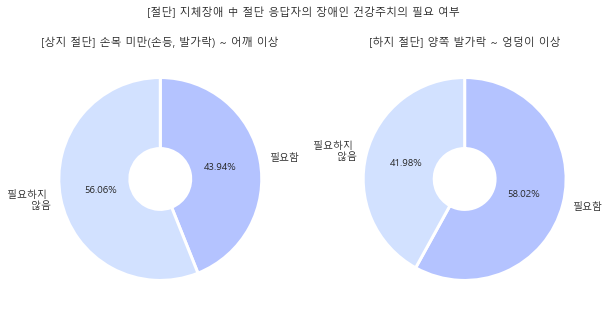

In [43]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(10, 5)

## ax1
ratios = [156, 199]
labels=['필요함', '필요하지 \n않음']
colors = ['#b4c3ff', '#d2e1ff', '#e8f5ff']
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 3}

ax1.pie(ratios, labels = labels, colors=colors, startangle = 90, counterclock=False, wedgeprops=wedgeprops, autopct='%0.2f%%')
ax1.set_title('[상지 절단] 손목 미만(손등, 발가락) ~ 어깨 이상', size=11)

## ax2
ratios = [47, 34]
labels=['필요함', '필요하지 \n않음']
colors = ['#b4c3ff', '#d2e1ff', '#e8f5ff']
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 3}

ax2.pie(ratios, labels = labels, colors=colors, startangle = 90, counterclock=False, wedgeprops=wedgeprops, autopct='%0.2f%%')
ax2.set_title('[하지 절단] 양쪽 발가락 ~ 엉덩이 이상', size=11)


plt.suptitle('[절단] 지체장애 中 절단 응답자의 장애인 건강주치의 필요 여부', size=11)
# plt.savefig("pyvisual/지체장애/절단/[절단]지체장애 中 절단 응답자의 장애인 건강주치의 필요 여부.png", dpi=300)
plt.show()

### '건강주치의'에게 받는 보건/의료서비스 중 필요하다고 생각하는 것

In [29]:
cut_service = df2.loc[df2['건강주치의 필요']==1][['가장 불편한 부위2', '건강주치의_필요서비스1', '건강주치의_필요서비스2']]
cut_service

,가장 불편한 부위2,건강주치의_필요서비스1,건강주치의_필요서비스2
60,"[상지 절단]손목미만(손등, 손가락)~어깨 이상",1,2
75,[하지 절단]양쪽 발가락~엉덩이 이상,6,2
102,"[상지 절단]손목미만(손등, 손가락)~어깨 이상",4,1
120,"[상지 절단]손목미만(손등, 손가락)~어깨 이상",3,6
121,"[상지 절단]손목미만(손등, 손가락)~어깨 이상",2,6
...,...,...,...
6384,"[상지 절단]손목미만(손등, 손가락)~어깨 이상",2,4
6389,[하지 절단]양쪽 발가락~엉덩이 이상,2,5
6423,"[상지 절단]손목미만(손등, 손가락)~어깨 이상",1,5
6483,"[상지 절단]손목미만(손등, 손가락)~어깨 이상",1,2


#### **상지 절단**

In [35]:
high_cut_service_g = cut_service.loc[df2['가장 불편한 부위2']=='[상지 절단]손목미만(손등, 손가락)~어깨 이상'].groupby(['건강주치의_필요서비스1', '건강주치의_필요서비스2'])[['건강주치의_필요서비스1']].count().add_suffix('_Count').reset_index()
high_cut_service_g.head()

,건강주치의_필요서비스1,건강주치의_필요서비스2,건강주치의_필요서비스1_Count
0,1,0,1
1,1,2,33
2,1,3,9
3,1,4,3
4,1,5,4


In [37]:
high_cut_pivot1 = high_cut_service_g.pivot('건강주치의_필요서비스2', '건강주치의_필요서비스1', '건강주치의_필요서비스1_Count')
high_cut_pivot1.fillna(0, inplace=True)
high_cut_pivot1

건강주치의_필요서비스1,1,2,3,4,5,6
건강주치의_필요서비스2,,,,,,
0,1.0,5.0,1.0,0.0,2.0,2.0
1,0.0,13.0,4.0,2.0,0.0,4.0
2,33.0,0.0,7.0,2.0,0.0,5.0
3,9.0,12.0,0.0,0.0,0.0,0.0
4,3.0,11.0,3.0,0.0,1.0,1.0
5,4.0,2.0,0.0,2.0,0.0,0.0
6,6.0,12.0,7.0,1.0,1.0,0.0


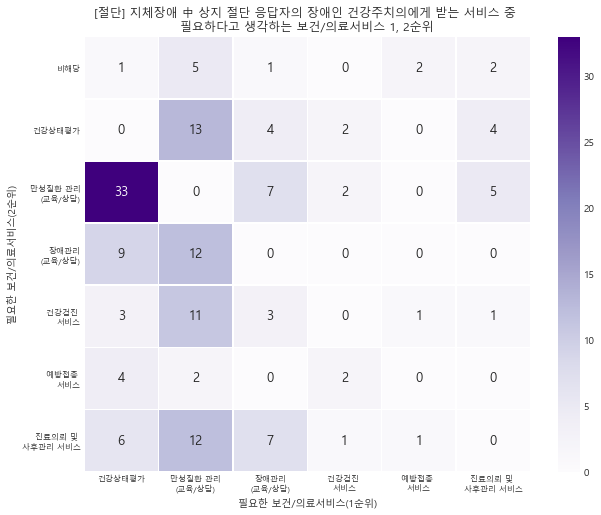

In [42]:
x_axis_labels = ['건강상태평가', '만성질환 관리\n(교육/상담)', '장애관리\n(교육/상담)', 
                 '건강검진 \n서비스', '예방접종 \n서비스', '진료의뢰 및 \n사후관리 서비스'] # 1순위
y_axis_labels = ['비해당', '건강상태평가', '만성질환 관리\n(교육/상담)', '장애관리\n(교육/상담)', 
                 '건강검진 \n서비스', '예방접종 \n서비스', '진료의뢰 및 \n사후관리 서비스'] # 2순위

fig, ax = plt.subplots()
fig.set_size_inches(10, 8)

sns.heatmap(high_cut_pivot1, cbar=True, cmap='Purples', linewidths=0.5, annot=True, annot_kws={"size": 13},
           xticklabels = x_axis_labels, yticklabels=y_axis_labels, fmt = 'g')
ax.set_title("[절단] 지체장애 中 상지 절단 응답자의 장애인 건강주치의에게 받는 서비스 중 \n필요하다고 생각하는 보건/의료서비스 1, 2순위", size = 12)
ax.tick_params(axis = 'y', labelsize =8, labelrotation = 0)
ax.tick_params(axis = 'x', labelsize =8, labelrotation = 0)
ax.set_xlabel('필요한 보건/의료서비스(1순위)', size = 10)
ax.set_ylabel('필요한 보건/의료서비스(2순위)', size = 10)
# plt.gcf().subplots_adjust(left=0.18)

# plt.savefig("pyvisual/지체장애/절단/[절단]지체장애 中 상지 절단 응답자의 장애인 건강주치의에게 받는 서비스 중 필요하다고 생각하는 보건, 의료서비스 1, 2순위.png", dpi=300)
plt.show()

#### **하지 절단**

In [44]:
low_cut_service_g = cut_service.loc[df2['가장 불편한 부위2']=='[하지 절단]양쪽 발가락~엉덩이 이상'].groupby(['건강주치의_필요서비스1', '건강주치의_필요서비스2'])[['건강주치의_필요서비스1']].count().add_suffix('_Count').reset_index()
low_cut_service_g.head()

,건강주치의_필요서비스1,건강주치의_필요서비스2,건강주치의_필요서비스1_Count
0,1,2,4
1,1,3,2
2,1,6,1
3,2,1,5
4,2,3,7


In [45]:
low_cut_pivot1 = low_cut_service_g.pivot('건강주치의_필요서비스2', '건강주치의_필요서비스1', '건강주치의_필요서비스1_Count')
low_cut_pivot1.fillna(0, inplace=True)
low_cut_pivot1

건강주치의_필요서비스1,1,2,3,4,6
건강주치의_필요서비스2,,,,,
0,0.0,0.0,4.0,0.0,1.0
1,0.0,5.0,3.0,0.0,1.0
2,4.0,0.0,9.0,1.0,3.0
3,2.0,7.0,0.0,0.0,0.0
4,0.0,1.0,1.0,0.0,0.0
5,0.0,1.0,0.0,0.0,0.0
6,1.0,2.0,1.0,0.0,0.0


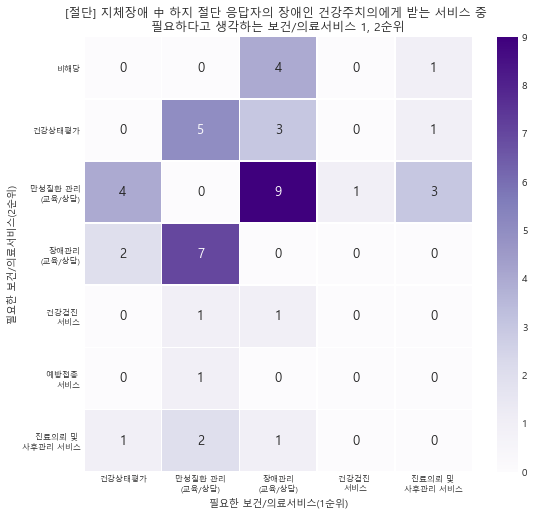

In [255]:
x_axis_labels = ['건강상태평가', '만성질환 관리\n(교육/상담)', '장애관리\n(교육/상담)', 
                 '건강검진 \n서비스',  '진료의뢰 및 \n사후관리 서비스'] # 1순위
y_axis_labels = ['비해당', '건강상태평가', '만성질환 관리\n(교육/상담)', '장애관리\n(교육/상담)', 
                 '건강검진 \n서비스', '예방접종 \n서비스', '진료의뢰 및 \n사후관리 서비스'] # 2순위

fig, ax = plt.subplots()
fig.set_size_inches(8.7, 8)

sns.heatmap(low_cut_pivot1, cbar=True, cmap='Purples', linewidths=0.5, annot=True, annot_kws={"size": 13},
           xticklabels = x_axis_labels, yticklabels=y_axis_labels, fmt = 'g')
ax.set_title("[절단] 지체장애 中 하지 절단 응답자의 장애인 건강주치의에게 받는 서비스 중 \n필요하다고 생각하는 보건/의료서비스 1, 2순위", size = 12)
ax.tick_params(axis = 'y', labelsize =8, labelrotation = 0)
ax.tick_params(axis = 'x', labelsize =8, labelrotation = 0)
ax.set_xlabel('필요한 보건/의료서비스(1순위)', size = 10)
ax.set_ylabel('필요한 보건/의료서비스(2순위)', size = 10)
# plt.gcf().subplots_adjust(left=0.18)

# plt.savefig("pyvisual/지체장애/절단/[절단]지체장애 中 하지 절단 응답자의 장애인 건강주치의에게 받는 서비스 중 필요하다고 생각하는 보건, 의료서비스 1, 2순위.png", dpi=300)
plt.show()

### 건강주치의가 필요하지 않는 이유

In [52]:
cut_not_need = df2.loc[df2['건강주치의 필요']==2][['가장 불편한 부위2', '건강주치의 불필요한 이유']].value_counts().reset_index()
cut_not_need

,가장 불편한 부위2,건강주치의 불필요한 이유,0
0,"[상지 절단]손목미만(손등, 손가락)~어깨 이상",1,107
1,"[상지 절단]손목미만(손등, 손가락)~어깨 이상",3,41
2,"[상지 절단]손목미만(손등, 손가락)~어깨 이상",4,27
3,"[상지 절단]손목미만(손등, 손가락)~어깨 이상",2,24
4,[하지 절단]양쪽 발가락~엉덩이 이상,1,17
5,[하지 절단]양쪽 발가락~엉덩이 이상,3,11
6,[하지 절단]양쪽 발가락~엉덩이 이상,2,3
7,[하지 절단]양쪽 발가락~엉덩이 이상,4,3


#### **상지 절단**

In [131]:
high_cut_not_need = cut_not_need.loc[cut_not_need['가장 불편한 부위2']=='[상지 절단]손목미만(손등, 손가락)~어깨 이상']
high_cut_not_need

,가장 불편한 부위2,건강주치의 불필요한 이유,0
0,"[상지 절단]손목미만(손등, 손가락)~어깨 이상",1,107
1,"[상지 절단]손목미만(손등, 손가락)~어깨 이상",3,41
2,"[상지 절단]손목미만(손등, 손가락)~어깨 이상",4,27
3,"[상지 절단]손목미만(손등, 손가락)~어깨 이상",2,24


In [227]:
high_cut_not_need['pct'] = round(high_cut_not_need[0] / high_cut_not_need[0].sum()*100, 2)
high_cut_not_need

<ipython-input-227-228cdeabe814>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_cut_not_need['pct'] = round(high_cut_not_need[0] / high_cut_not_need[0].sum()*100, 2)


,가장 불편한 부위2,건강주치의 불필요한 이유,0,pct
0,"[상지 절단]손목미만(손등, 손가락)~어깨 이상",1,107,53.77
1,"[상지 절단]손목미만(손등, 손가락)~어깨 이상",3,41,20.60
2,"[상지 절단]손목미만(손등, 손가락)~어깨 이상",4,27,13.57
3,"[상지 절단]손목미만(손등, 손가락)~어깨 이상",2,24,12.06


In [132]:
col_lst1 = high_cut_not_need['건강주치의 불필요한 이유'].tolist()
col_lst1

[1, 3, 4, 2]

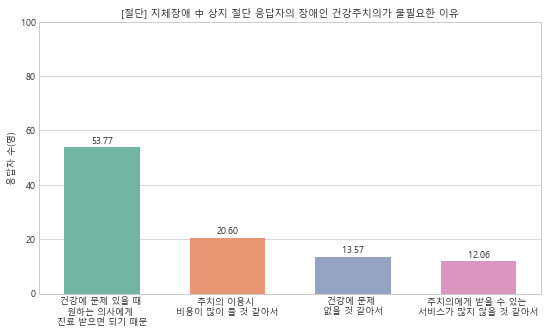

In [229]:
fig, ax = plt.subplots()
fig.set_size_inches(9, 5)

splot = sns.barplot(data = high_cut_not_need, x = '건강주치의 불필요한 이유', y = 'pct', order=col_lst1, palette='Set2')
ax.set_title('[절단] 지체장애 中 상지 절단 응답자의 장애인 건강주치의가 불필요한 이유', size = 10)
ax.set_xlabel('')
ax.set_ylabel('비율(%)', size = 9)
ax.set_xticklabels(['건강에 문제 있을 때 \n원하는 의사에게 \n진료 받으면 되기 때문', '주치의 이용시 \n비용이 많이 들 것 같아서', 
                    '건강에 문제 \n없을 것 같아서', '주치의에게 받을 수 있는 \n서비스가 많지 않을 것 같아서'], size = 9)
ax.tick_params(axis='both', labelsize = 9) # x축 눈금 크기 조절
ax.set_ylim([0, 100]) # y축 눈금 범위 설정
### 비율(%) 라벨링 하기
for bar in splot.patches: # value label 생성
    ax.annotate("{:0.2f}".format(float(bar.get_height())), # value 값 표시
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=9, xytext=(0, 6),
                   textcoords='offset points')

## seaborn 막대 그래프 너비 설정
def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)

change_width(ax, .6)
    
# plt.savefig("pyvisual/지체장애/절단/[절단]지체장애 中 상지 절단 응답자의 장애인 건강주치의가 불필요한 이유.png", dpi=300)
plt.show()

#### **하지 절단**

In [127]:
low_cut_not_need = cut_not_need.loc[cut_not_need['가장 불편한 부위2']=='[하지 절단]양쪽 발가락~엉덩이 이상']
low_cut_not_need

,가장 불편한 부위2,건강주치의 불필요한 이유,0
4,[하지 절단]양쪽 발가락~엉덩이 이상,1,17
5,[하지 절단]양쪽 발가락~엉덩이 이상,3,11
6,[하지 절단]양쪽 발가락~엉덩이 이상,2,3
7,[하지 절단]양쪽 발가락~엉덩이 이상,4,3


In [230]:
low_cut_not_need['pct'] = round(low_cut_not_need[0] / low_cut_not_need[0].sum()*100, 2)
low_cut_not_need

<ipython-input-230-8429aece01f8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  low_cut_not_need['pct'] = round(low_cut_not_need[0] / low_cut_not_need[0].sum()*100, 2)


,가장 불편한 부위2,건강주치의 불필요한 이유,0,pct
4,[하지 절단]양쪽 발가락~엉덩이 이상,1,17,50.00
5,[하지 절단]양쪽 발가락~엉덩이 이상,3,11,32.35
6,[하지 절단]양쪽 발가락~엉덩이 이상,2,3,8.82
7,[하지 절단]양쪽 발가락~엉덩이 이상,4,3,8.82


In [128]:
col_lst2 = low_cut_not_need['건강주치의 불필요한 이유'].tolist()
col_lst2

[1, 3, 2, 4]

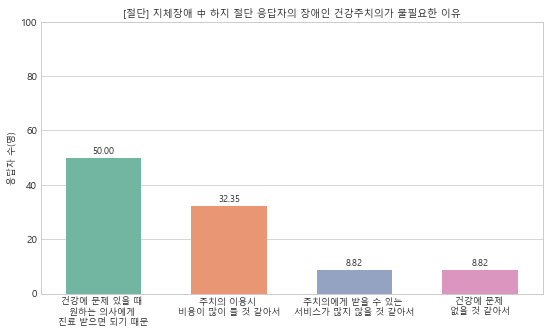

In [232]:
fig, ax = plt.subplots()
fig.set_size_inches(9, 5)

splot = sns.barplot(data = low_cut_not_need, x = '건강주치의 불필요한 이유', y = 'pct', order=col_lst2, palette='Set2')
ax.set_title('[절단] 지체장애 中 하지 절단 응답자의 장애인 건강주치의가 불필요한 이유', size = 10)
ax.set_xlabel('')
ax.set_ylabel('비율(%)', size = 9)
ax.set_xticklabels(['건강에 문제 있을 때 \n원하는 의사에게 \n진료 받으면 되기 때문', '주치의 이용시 \n비용이 많이 들 것 같아서', 
                    '주치의에게 받을 수 있는 \n서비스가 많지 않을 것 같아서', '건강에 문제 \n없을 것 같아서'], size = 9)
ax.tick_params(axis='both', labelsize = 9) # x축 눈금 크기 조절
ax.set_ylim([0, 100]) # y축 눈금 범위 설정
### 비율(%) 라벨링 하기
for bar in splot.patches: # value label 생성
    ax.annotate("{:0.2f}".format(float(bar.get_height())), # value 값 표시
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=9, xytext=(0, 6),
                   textcoords='offset points')

## seaborn 막대 그래프 너비 설정
def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)

change_width(ax, .6)
    
# plt.savefig("pyvisual/지체장애/절단/[절단]지체장애 中 하지 절단 응답자의 장애인 건강주치의가 불필요한 이유.png", dpi=300)
plt.show()

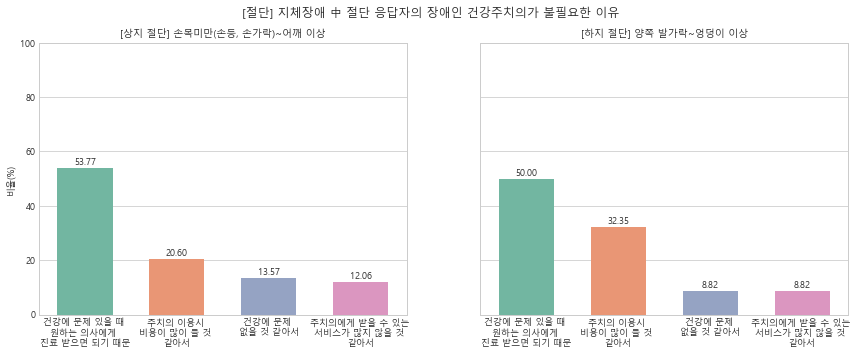

In [235]:
# 통합
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
fig.set_size_inches(14.5, 5)

splot1 = sns.barplot(data = high_cut_not_need, x = '건강주치의 불필요한 이유', y = 'pct', order=col_lst1, palette='Set2', ax=ax1)
ax1.set_title('[상지 절단] 손목미만(손등, 손가락)~어깨 이상', size = 10)
ax1.set_xlabel('')
ax1.set_ylabel('비율(%)', size = 9)
ax1.set_xticklabels(['건강에 문제 있을 때 \n원하는 의사에게 \n진료 받으면 되기 때문', '주치의 이용시 \n비용이 많이 들 것 \n같아서', 
                    '건강에 문제 \n없을 것 같아서', '주치의에게 받을 수 있는 \n서비스가 많지 않을 것 \n같아서'], size = 9)
ax1.tick_params(axis='both', labelsize = 9) # x축 눈금 크기 조절
ax1.set_ylim([0, 100]) # y축 눈금 범위 설정
### 비율(%) 라벨링 하기
for bar in splot1.patches: # value label 생성
    ax1.annotate("{:0.2f}".format(float(bar.get_height())), # value 값 표시
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=9, xytext=(0, 6),
                   textcoords='offset points')

splot2 = sns.barplot(data = low_cut_not_need, x = '건강주치의 불필요한 이유', y = 'pct', order=col_lst2, palette='Set2', ax=ax2)
ax2.set_title('[하지 절단] 양쪽 발가락~엉덩이 이상', size = 10)
ax2.set_xlabel('')
ax2.set_ylabel('', size = 9)
ax2.set_xticklabels(['건강에 문제 있을 때 \n원하는 의사에게 \n진료 받으면 되기 때문', '주치의 이용시 \n비용이 많이 들 것 \n같아서', 
                    '건강에 문제 \n없을 것 같아서', '주치의에게 받을 수 있는 \n서비스가 많지 않을 것 \n같아서'], size = 9)
ax2.tick_params(axis='both', labelsize = 9) # x축 눈금 크기 조절
ax2.set_ylim([0, 100]) # y축 눈금 범위 설정
### 비율(%) 라벨링 하기
for bar in splot2.patches: # value label 생성
    ax2.annotate("{:0.2f}".format(float(bar.get_height())), # value 값 표시
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=9, xytext=(0, 6),
                   textcoords='offset points')
    
## seaborn 막대 그래프 너비 설정
def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)

change_width(ax1, .6)
change_width(ax2, .6)

plt.suptitle('[절단] 지체장애 中 절단 응답자의 장애인 건강주치의가 불필요한 이유')
# plt.savefig("pyvisual/지체장애/절단/[절단]지체장애 中 절단 응답자의 장애인 건강주치의가 불필요한 이유.png", dpi=300)
plt.show()

---
## 가장 불편한 부위: 마비
### '나의 건강관리의사' 필요 여부

In [82]:
pd.DataFrame(df3[['가장 불편한 부위2', '건강주치의 필요']].value_counts())

0
가장 불편한 부위2                   건강주치의 필요     
[하지 마비]하지 한쪽 or 양쪽           1         161
                             2         119
[상지 마비]상지 한쪽 or 양쪽           2          39
                             1          38
[상하지 마비]상하지 한쪽 or 양쪽 or 전신마비 1          36
                             2          24

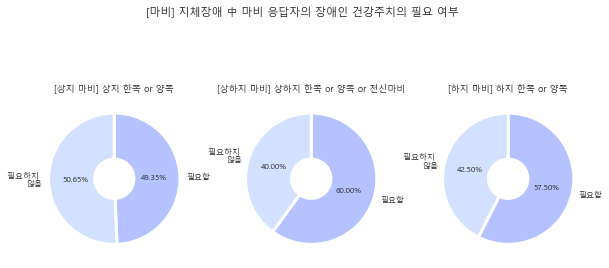

In [90]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.set_size_inches(10, 5)

## ax1
ratios = [38, 39]
labels=['필요함', '필요하지 \n않음']
colors = ['#b4c3ff', '#d2e1ff', '#e8f5ff']
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 3}

ax1.pie(ratios, labels = labels, colors=colors, startangle = 90, counterclock=False, wedgeprops=wedgeprops, autopct='%0.2f%%',
       textprops={'fontsize': 8})
ax1.set_title('[상지 마비] 상지 한쪽 or 양쪽', size=9)

## ax2
ratios = [36, 24]
labels=['필요함', '필요하지 \n않음']
colors = ['#b4c3ff', '#d2e1ff', '#e8f5ff']
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 3}

ax2.pie(ratios, labels = labels, colors=colors, startangle = 90, counterclock=False, wedgeprops=wedgeprops, autopct='%0.2f%%',
       textprops={'fontsize': 8})
ax2.set_title('[상하지 마비] 상하지 한쪽 or 양쪽 or 전신마비', size=9)

## ax3
ratios = [161, 119]
labels=['필요함', '필요하지 \n않음']
colors = ['#b4c3ff', '#d2e1ff', '#e8f5ff']
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 3}

ax3.pie(ratios, labels = labels, colors=colors, startangle = 90, counterclock=False, wedgeprops=wedgeprops, autopct='%0.2f%%',
       textprops={'fontsize': 8})
ax3.set_title('[하지 마비] 하지 한쪽 or 양쪽', size=9)


plt.suptitle('[마비] 지체장애 中 마비 응답자의 장애인 건강주치의 필요 여부', size=11)
# plt.savefig("pyvisual/지체장애/마비/[마비]지체장애 中 마비 응답자의 장애인 건강주치의 필요 여부.png", dpi=300)
plt.show()

### '건강주치의'에게 받는 보건/의료서비스 중 필요하다고 생각하는 것

In [91]:
paralysis_service = df3.loc[df3['건강주치의 필요']==1][['가장 불편한 부위2', '건강주치의_필요서비스1', '건강주치의_필요서비스2']]
paralysis_service

,가장 불편한 부위2,건강주치의_필요서비스1,건강주치의_필요서비스2
34,[하지 마비]하지 한쪽 or 양쪽,1,3
44,[하지 마비]하지 한쪽 or 양쪽,1,4
79,[상지 마비]상지 한쪽 or 양쪽,3,6
107,[상지 마비]상지 한쪽 or 양쪽,2,3
114,[하지 마비]하지 한쪽 or 양쪽,3,6
...,...,...,...
6201,[상지 마비]상지 한쪽 or 양쪽,5,1
6224,[상하지 마비]상하지 한쪽 or 양쪽 or 전신마비,1,6
6329,[상하지 마비]상하지 한쪽 or 양쪽 or 전신마비,6,0
6353,[하지 마비]하지 한쪽 or 양쪽,1,3


#### **상지 마비**

In [95]:
high_paralysis_service_g = paralysis_service.loc[df3['가장 불편한 부위2']=='[상지 마비]상지 한쪽 or 양쪽'].groupby(['건강주치의_필요서비스1', '건강주치의_필요서비스2'])[['건강주치의_필요서비스1']].count().add_suffix('_Count').reset_index()
high_paralysis_service_g.head()

,건강주치의_필요서비스1,건강주치의_필요서비스2,건강주치의_필요서비스1_Count
0,1,2,1
1,1,3,2
2,1,6,1
3,2,0,1
4,2,1,2


In [96]:
high_paralysis_pivot1 = high_paralysis_service_g.pivot('건강주치의_필요서비스2', '건강주치의_필요서비스1', '건강주치의_필요서비스1_Count')
high_paralysis_pivot1.fillna(0, inplace=True)
high_paralysis_pivot1

건강주치의_필요서비스1,1,2,3,4,5,6
건강주치의_필요서비스2,,,,,,
0,0.0,1.0,1.0,0.0,0.0,2.0
1,0.0,2.0,2.0,0.0,1.0,2.0
2,1.0,0.0,5.0,0.0,1.0,0.0
3,2.0,4.0,0.0,0.0,0.0,1.0
4,0.0,2.0,1.0,0.0,0.0,0.0
5,0.0,0.0,0.0,1.0,0.0,0.0
6,1.0,3.0,3.0,2.0,0.0,0.0


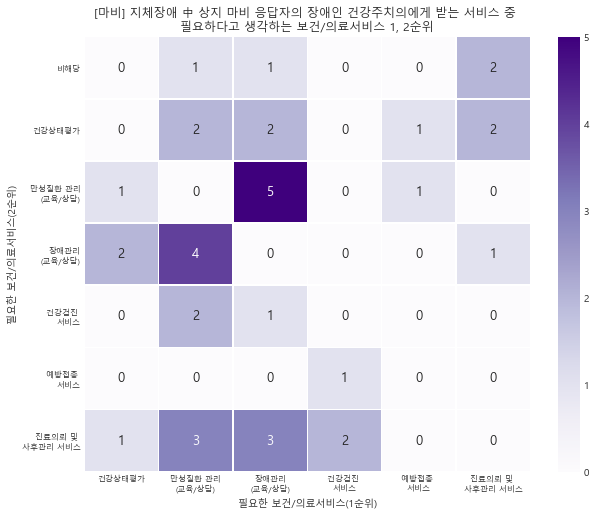

In [214]:
x_axis_labels = ['건강상태평가', '만성질환 관리\n(교육/상담)', '장애관리\n(교육/상담)', 
                 '건강검진 \n서비스', '예방접종 \n서비스', '진료의뢰 및 \n사후관리 서비스'] # 1순위
y_axis_labels = ['비해당', '건강상태평가', '만성질환 관리\n(교육/상담)', '장애관리\n(교육/상담)', 
                 '건강검진 \n서비스', '예방접종 \n서비스', '진료의뢰 및 \n사후관리 서비스'] # 2순위

fig, ax = plt.subplots()
fig.set_size_inches(10, 8)

sns.heatmap(high_paralysis_pivot1, cbar=True, cmap='Purples', linewidths=0.5, annot=True, annot_kws={"size": 13},
           xticklabels = x_axis_labels, yticklabels=y_axis_labels, fmt = 'g')
ax.set_title("[마비] 지체장애 中 상지 마비 응답자의 장애인 건강주치의에게 받는 서비스 중 \n필요하다고 생각하는 보건/의료서비스 1, 2순위", size = 12)
ax.tick_params(axis = 'y', labelsize =8, labelrotation = 0)
ax.tick_params(axis = 'x', labelsize =8, labelrotation = 0)
ax.set_xlabel('필요한 보건/의료서비스(1순위)', size = 10)
ax.set_ylabel('필요한 보건/의료서비스(2순위)', size = 10)
# plt.gcf().subplots_adjust(left=0.18)

# plt.savefig("pyvisual/지체장애/마비/[마비]지체장애 中 상지 마비 응답자의 장애인 건강주치의에게 받는 서비스 중 필요하다고 생각하는 보건, 의료서비스 1, 2순위.png", dpi=300)
plt.show()

#### **하지 마비**

In [103]:
low_paralysis_service_g = paralysis_service.loc[df3['가장 불편한 부위2']=='[하지 마비]하지 한쪽 or 양쪽'].groupby(['건강주치의_필요서비스1', '건강주치의_필요서비스2'])[['건강주치의_필요서비스1']].count().add_suffix('_Count').reset_index()
low_paralysis_service_g.head()

,건강주치의_필요서비스1,건강주치의_필요서비스2,건강주치의_필요서비스1_Count
0,1,0,3
1,1,2,16
2,1,3,16
3,1,4,7
4,1,5,1


In [101]:
low_paralysis_pivot1 = low_paralysis_service_g.pivot('건강주치의_필요서비스2', '건강주치의_필요서비스1', '건강주치의_필요서비스1_Count')
low_paralysis_pivot1.fillna(0, inplace=True)
low_paralysis_pivot1

건강주치의_필요서비스1,1,2,3,4,5,6
건강주치의_필요서비스2,,,,,,
0,3.0,0.0,3.0,0.0,0.0,2.0
1,0.0,11.0,12.0,1.0,0.0,3.0
2,16.0,0.0,14.0,2.0,2.0,1.0
3,16.0,18.0,0.0,0.0,1.0,5.0
4,7.0,6.0,4.0,0.0,0.0,1.0
5,1.0,1.0,2.0,1.0,0.0,0.0
6,6.0,6.0,15.0,1.0,0.0,0.0


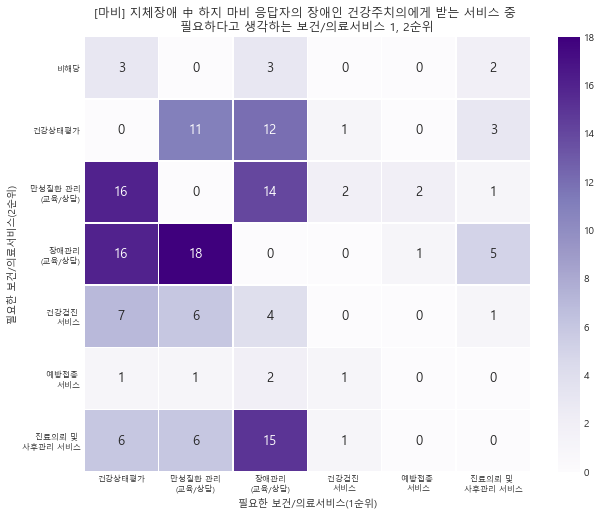

In [105]:
x_axis_labels = ['건강상태평가', '만성질환 관리\n(교육/상담)', '장애관리\n(교육/상담)', 
                 '건강검진 \n서비스', '예방접종 \n서비스', '진료의뢰 및 \n사후관리 서비스'] # 1순위
y_axis_labels = ['비해당', '건강상태평가', '만성질환 관리\n(교육/상담)', '장애관리\n(교육/상담)', 
                 '건강검진 \n서비스', '예방접종 \n서비스', '진료의뢰 및 \n사후관리 서비스'] # 2순위

fig, ax = plt.subplots()
fig.set_size_inches(10, 8)

sns.heatmap(low_paralysis_pivot1, cbar=True, cmap='Purples', linewidths=0.5, annot=True, annot_kws={"size": 13},
           xticklabels = x_axis_labels, yticklabels=y_axis_labels, fmt = 'g')
ax.set_title("[마비] 지체장애 中 하지 마비 응답자의 장애인 건강주치의에게 받는 서비스 중 \n필요하다고 생각하는 보건/의료서비스 1, 2순위", size = 12)
ax.tick_params(axis = 'y', labelsize =8, labelrotation = 0)
ax.tick_params(axis = 'x', labelsize =8, labelrotation = 0)
ax.set_xlabel('필요한 보건/의료서비스(1순위)', size = 10)
ax.set_ylabel('필요한 보건/의료서비스(2순위)', size = 10)
# plt.gcf().subplots_adjust(left=0.18)

# plt.savefig("pyvisual/지체장애/마비/[마비]지체장애 中 하지 마비 응답자의 장애인 건강주치의에게 받는 서비스 중 필요하다고 생각하는 보건, 의료서비스 1, 2순위.png", dpi=300)
plt.show()

#### **상하지 마비**

In [106]:
med_paralysis_service_g = paralysis_service.loc[df3['가장 불편한 부위2']=='[상하지 마비]상하지 한쪽 or 양쪽 or 전신마비'].groupby(['건강주치의_필요서비스1', '건강주치의_필요서비스2'])[['건강주치의_필요서비스1']].count().add_suffix('_Count').reset_index()
med_paralysis_service_g.head()

,건강주치의_필요서비스1,건강주치의_필요서비스2,건강주치의_필요서비스1_Count
0,1,2,3
1,1,3,3
2,1,4,1
3,1,6,1
4,2,1,3


In [107]:
med_paralysis_pivot1 = med_paralysis_service_g.pivot('건강주치의_필요서비스2', '건강주치의_필요서비스1', '건강주치의_필요서비스1_Count')
med_paralysis_pivot1.fillna(0, inplace=True)
med_paralysis_pivot1

건강주치의_필요서비스1,1,2,3,5,6
건강주치의_필요서비스2,,,,,
0,0.0,0.0,2.0,0.0,1.0
1,0.0,3.0,1.0,0.0,1.0
2,3.0,0.0,5.0,0.0,1.0
3,3.0,1.0,0.0,0.0,0.0
4,1.0,1.0,2.0,0.0,0.0
5,0.0,1.0,0.0,0.0,0.0
6,1.0,4.0,4.0,1.0,0.0


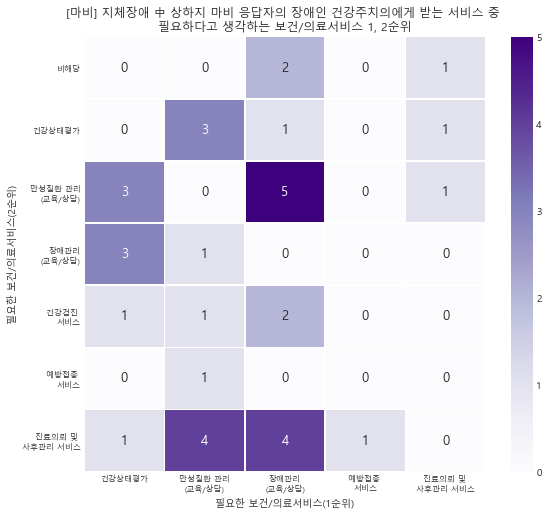

In [215]:
x_axis_labels = ['건강상태평가', '만성질환 관리\n(교육/상담)', '장애관리\n(교육/상담)', 
                 '예방접종 \n서비스', '진료의뢰 및 \n사후관리 서비스'] # 1순위
y_axis_labels = ['비해당', '건강상태평가', '만성질환 관리\n(교육/상담)', '장애관리\n(교육/상담)', 
                 '건강검진 \n서비스', '예방접종 \n서비스', '진료의뢰 및 \n사후관리 서비스'] # 2순위

fig, ax = plt.subplots()
fig.set_size_inches(9, 8)

sns.heatmap(med_paralysis_pivot1, cbar=True, cmap='Purples', linewidths=0.5, annot=True, annot_kws={"size": 13},
           xticklabels = x_axis_labels, yticklabels=y_axis_labels, fmt = 'g')
ax.set_title("[마비] 지체장애 中 상하지 마비 응답자의 장애인 건강주치의에게 받는 서비스 중 \n필요하다고 생각하는 보건/의료서비스 1, 2순위", size = 12)
ax.tick_params(axis = 'y', labelsize =8, labelrotation = 0)
ax.tick_params(axis = 'x', labelsize =8, labelrotation = 0)
ax.set_xlabel('필요한 보건/의료서비스(1순위)', size = 10)
ax.set_ylabel('필요한 보건/의료서비스(2순위)', size = 10)
# plt.gcf().subplots_adjust(left=0.18)

# plt.savefig("pyvisual/지체장애/마비/[마비]지체장애 中 상하지 마비 응답자의 장애인 건강주치의에게 받는 서비스 중 필요하다고 생각하는 보건, 의료서비스 1, 2순위.png", dpi=300)
plt.show()

### 건강주치의가 필요하지 않는 이유

In [109]:
paralysis_not_need = df3.loc[df3['건강주치의 필요']==2][['가장 불편한 부위2', '건강주치의 불필요한 이유']].value_counts().reset_index()
paralysis_not_need

,가장 불편한 부위2,건강주치의 불필요한 이유,0
0,[하지 마비]하지 한쪽 or 양쪽,1,57
1,[하지 마비]하지 한쪽 or 양쪽,3,25
2,[상지 마비]상지 한쪽 or 양쪽,1,24
3,[하지 마비]하지 한쪽 or 양쪽,2,22
4,[하지 마비]하지 한쪽 or 양쪽,4,14
5,[상하지 마비]상하지 한쪽 or 양쪽 or 전신마비,1,13
6,[상지 마비]상지 한쪽 or 양쪽,3,7
7,[상하지 마비]상하지 한쪽 or 양쪽 or 전신마비,3,7
8,[상지 마비]상지 한쪽 or 양쪽,2,6
9,[상지 마비]상지 한쪽 or 양쪽,4,2


#### **상지 마비**

In [111]:
high_paralysis_not_need = paralysis_not_need.loc[paralysis_not_need['가장 불편한 부위2']=='[상지 마비]상지 한쪽 or 양쪽']
high_paralysis_not_need

,가장 불편한 부위2,건강주치의 불필요한 이유,0
2,[상지 마비]상지 한쪽 or 양쪽,1,24
6,[상지 마비]상지 한쪽 or 양쪽,3,7
8,[상지 마비]상지 한쪽 or 양쪽,2,6
9,[상지 마비]상지 한쪽 or 양쪽,4,2


In [218]:
high_paralysis_not_need['pct'] = round(high_paralysis_not_need[0] / high_paralysis_not_need[0].sum()*100, 2)
high_paralysis_not_need

<ipython-input-218-aa4f902a856b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_paralysis_not_need['pct'] = round(high_paralysis_not_need[0] / high_paralysis_not_need[0].sum()*100, 2)


,가장 불편한 부위2,건강주치의 불필요한 이유,0,pct
2,[상지 마비]상지 한쪽 or 양쪽,1,24,61.54
6,[상지 마비]상지 한쪽 or 양쪽,3,7,17.95
8,[상지 마비]상지 한쪽 or 양쪽,2,6,15.38
9,[상지 마비]상지 한쪽 or 양쪽,4,2,5.13


In [138]:
col_lst3 = high_paralysis_not_need['건강주치의 불필요한 이유'].tolist()
col_lst3

[1, 3, 2, 4]

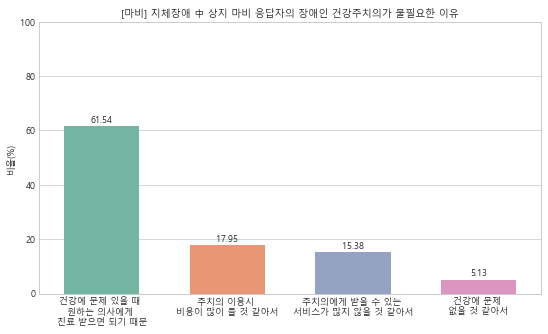

In [238]:
fig, ax = plt.subplots()
fig.set_size_inches(9, 5)

splot = sns.barplot(data = high_paralysis_not_need, x = '건강주치의 불필요한 이유', y = 'pct', order=col_lst3, palette='Set2')
ax.set_title('[마비] 지체장애 中 상지 마비 응답자의 장애인 건강주치의가 불필요한 이유', size = 10)
ax.set_xlabel('')
ax.set_ylabel('비율(%)', size = 9)
ax.set_xticklabels(['건강에 문제 있을 때 \n원하는 의사에게 \n진료 받으면 되기 때문', '주치의 이용시 \n비용이 많이 들 것 같아서', 
                    '주치의에게 받을 수 있는 \n서비스가 많지 않을 것 같아서','건강에 문제 \n없을 것 같아서'], size = 9)
ax.tick_params(axis='both', labelsize = 9) # x축 눈금 크기 조절
ax.set_ylim([0, 100]) # y축 눈금 범위 설정
### 비율(%) 라벨링 하기
for bar in splot.patches: # value label 생성
    ax.annotate("{:0.2f}".format(float(bar.get_height())), # value 값 표시
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=9, xytext=(0, 6),
                   textcoords='offset points')

## seaborn 막대 그래프 너비 설정
def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)

change_width(ax, .6)
    
# plt.savefig("pyvisual/지체장애/마비/[마비]지체장애 中 상지 마비 응답자의 장애인 건강주치의가 불필요한 이유.png", dpi=300)
plt.show()

#### **하지 마비**

In [140]:
low_paralysis_not_need = paralysis_not_need.loc[paralysis_not_need['가장 불편한 부위2']=='[하지 마비]하지 한쪽 or 양쪽']
low_paralysis_not_need

,가장 불편한 부위2,건강주치의 불필요한 이유,0
0,[하지 마비]하지 한쪽 or 양쪽,1,57
1,[하지 마비]하지 한쪽 or 양쪽,3,25
3,[하지 마비]하지 한쪽 or 양쪽,2,22
4,[하지 마비]하지 한쪽 or 양쪽,4,14
12,[하지 마비]하지 한쪽 or 양쪽,5,1


In [223]:
low_paralysis_not_need['pct'] = round(low_paralysis_not_need[0] / low_paralysis_not_need[0].sum()*100, 2)
low_paralysis_not_need

<ipython-input-223-61ca257452a1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  low_paralysis_not_need['pct'] = round(low_paralysis_not_need[0] / low_paralysis_not_need[0].sum()*100, 2)


,가장 불편한 부위2,건강주치의 불필요한 이유,0,pct
0,[하지 마비]하지 한쪽 or 양쪽,1,57,47.90
1,[하지 마비]하지 한쪽 or 양쪽,3,25,21.01
3,[하지 마비]하지 한쪽 or 양쪽,2,22,18.49
4,[하지 마비]하지 한쪽 or 양쪽,4,14,11.76
12,[하지 마비]하지 한쪽 or 양쪽,5,1,0.84


In [141]:
col_lst4 = low_paralysis_not_need['건강주치의 불필요한 이유'].tolist()
col_lst4

[1, 3, 2, 4, 5]

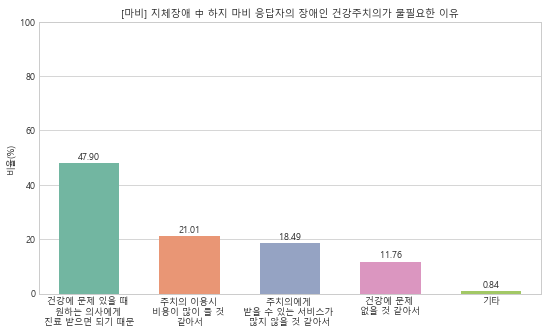

In [237]:
fig, ax = plt.subplots()
fig.set_size_inches(9, 5)

splot = sns.barplot(data = low_paralysis_not_need, x = '건강주치의 불필요한 이유', y = 'pct', order=col_lst4, palette='Set2')
ax.set_title('[마비] 지체장애 中 하지 마비 응답자의 장애인 건강주치의가 불필요한 이유', size = 10)
ax.set_xlabel('')
ax.set_ylabel('비율(%)', size = 9)
ax.set_xticklabels(['건강에 문제 있을 때 \n원하는 의사에게 \n진료 받으면 되기 때문', '주치의 이용시 \n비용이 많이 들 것 \n같아서', 
                    '주치의에게 \n받을 수 있는 서비스가 \n많지 않을 것 같아서', '건강에 문제 \n없을 것 같아서', '기타'], size = 9)
ax.tick_params(axis='both', labelsize = 9) # x축 눈금 크기 조절
ax.set_ylim([0, 100]) # y축 눈금 범위 설정
### 비율(%) 라벨링 하기
for bar in splot.patches: # value label 생성
    ax.annotate("{:0.2f}".format(float(bar.get_height())), # value 값 표시
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=9, xytext=(0, 6),
                   textcoords='offset points')

## seaborn 막대 그래프 너비 설정
def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)

change_width(ax, .6)
    
# plt.savefig("pyvisual/지체장애/마비/[마비]지체장애 中 하지 마비 응답자의 장애인 건강주치의가 불필요한 이유.png", dpi=300)
plt.show()

#### **상하지 마비**

In [145]:
med_paralysis_not_need = paralysis_not_need.loc[paralysis_not_need['가장 불편한 부위2']=='[상하지 마비]상하지 한쪽 or 양쪽 or 전신마비']
med_paralysis_not_need

,가장 불편한 부위2,건강주치의 불필요한 이유,0
5,[상하지 마비]상하지 한쪽 or 양쪽 or 전신마비,1,13
7,[상하지 마비]상하지 한쪽 or 양쪽 or 전신마비,3,7
10,[상하지 마비]상하지 한쪽 or 양쪽 or 전신마비,2,2
11,[상하지 마비]상하지 한쪽 or 양쪽 or 전신마비,4,2


In [225]:
med_paralysis_not_need['pct'] = round(med_paralysis_not_need[0] / med_paralysis_not_need[0].sum()*100, 2)
med_paralysis_not_need

<ipython-input-225-4c292f29fdb9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  med_paralysis_not_need['pct'] = round(med_paralysis_not_need[0] / med_paralysis_not_need[0].sum()*100, 2)


,가장 불편한 부위2,건강주치의 불필요한 이유,0,pct
5,[상하지 마비]상하지 한쪽 or 양쪽 or 전신마비,1,13,54.17
7,[상하지 마비]상하지 한쪽 or 양쪽 or 전신마비,3,7,29.17
10,[상하지 마비]상하지 한쪽 or 양쪽 or 전신마비,2,2,8.33
11,[상하지 마비]상하지 한쪽 or 양쪽 or 전신마비,4,2,8.33


In [146]:
col_lst5 = med_paralysis_not_need['건강주치의 불필요한 이유'].tolist()
col_lst5

[1, 3, 2, 4]

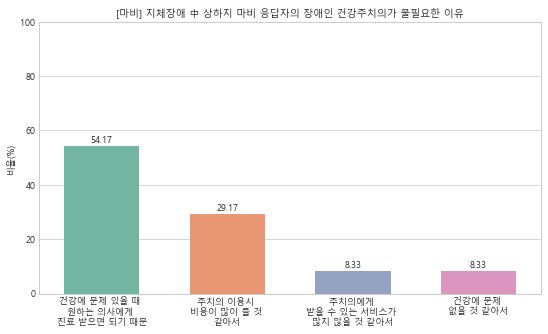

In [236]:
fig, ax = plt.subplots()
fig.set_size_inches(9, 5)

splot = sns.barplot(data = med_paralysis_not_need, x = '건강주치의 불필요한 이유', y = 'pct', order=col_lst5, palette='Set2')
ax.set_title('[마비] 지체장애 中 상하지 마비 응답자의 장애인 건강주치의가 불필요한 이유', size = 10)
ax.set_xlabel('')
ax.set_ylabel('비율(%)', size = 9)
ax.set_xticklabels(['건강에 문제 있을 때 \n원하는 의사에게 \n진료 받으면 되기 때문', '주치의 이용시 \n비용이 많이 들 것 \n같아서', 
                    '주치의에게 \n받을 수 있는 서비스가 \n많지 않을 것 같아서', '건강에 문제 \n없을 것 같아서'], size = 9)
ax.tick_params(axis='both', labelsize = 9) # x축 눈금 크기 조절
ax.set_ylim([0, 100]) # y축 눈금 범위 설정
### 비율(%) 라벨링 하기
for bar in splot.patches: # value label 생성
    ax.annotate("{:0.2f}".format(float(bar.get_height())), # value 값 표시
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=9, xytext=(0, 6),
                   textcoords='offset points')

## seaborn 막대 그래프 너비 설정
def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)

change_width(ax, .6)
    
# plt.savefig("pyvisual/지체장애/마비/[마비]지체장애 中 상하지 마비 응답자의 장애인 건강주치의가 불필요한 이유.png", dpi=300)
plt.show()

In [ ]:
## seaborn 막대 그래프 너비 설정
def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)

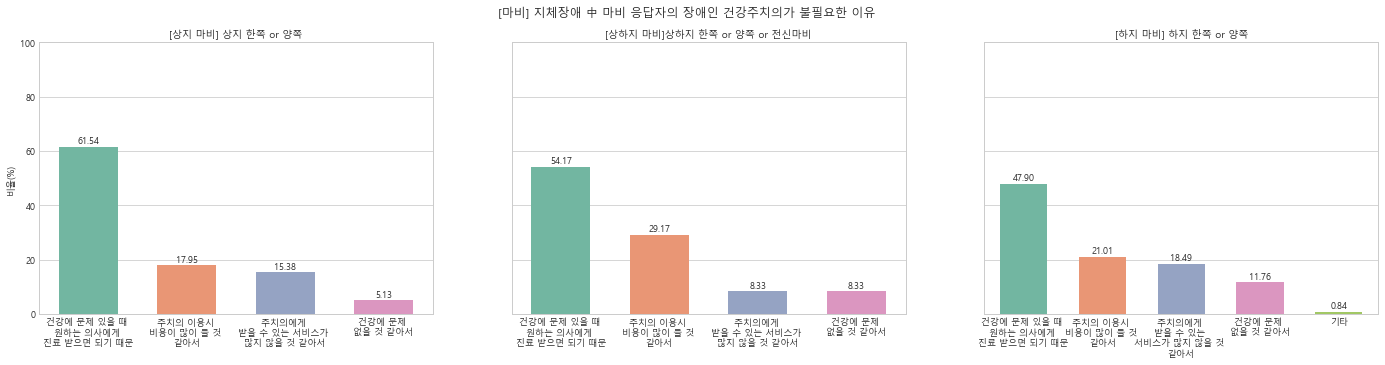

In [243]:
# 통합
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True)
fig.set_size_inches(24, 5)

## ax1
splot1 = sns.barplot(data = high_paralysis_not_need, x = '건강주치의 불필요한 이유', y = 'pct', order=col_lst3, palette='Set2', ax=ax1)
ax1.set_title('[상지 마비] 상지 한쪽 or 양쪽', size = 10)
ax1.set_xlabel('')
ax1.set_ylabel('비율(%)', size = 9)
ax1.set_xticklabels(['건강에 문제 있을 때 \n원하는 의사에게 \n진료 받으면 되기 때문', '주치의 이용시 \n비용이 많이 들 것 \n같아서', 
                    '주치의에게 \n받을 수 있는 서비스가 \n많지 않을 것 같아서', '건강에 문제 \n없을 것 같아서'], size = 9)
ax1.tick_params(axis='both', labelsize = 9) # x축 눈금 크기 조절
ax1.set_ylim([0, 100]) # y축 눈금 범위 설정

### 비율(%) 라벨링 하기
for bar in splot1.patches: # value label 생성
    ax1.annotate("{:0.2f}".format(float(bar.get_height())), # value 값 표시
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=9, xytext=(0, 6),
                   textcoords='offset points')

## ax2
splot2 = sns.barplot(data = med_paralysis_not_need, x = '건강주치의 불필요한 이유', y = 'pct', order=col_lst5, palette='Set2', ax=ax2)
ax2.set_title('[상하지 마비]상하지 한쪽 or 양쪽 or 전신마비', size = 10)
ax2.set_xlabel('')
ax2.set_ylabel('', size = 9)
ax2.set_xticklabels(['건강에 문제 있을 때 \n원하는 의사에게 \n진료 받으면 되기 때문', '주치의 이용시 \n비용이 많이 들 것 \n같아서', 
                    '주치의에게 \n받을 수 있는 서비스가 \n많지 않을 것 같아서', '건강에 문제 \n없을 것 같아서'], size = 9)
ax2.tick_params(axis='both', labelsize = 9) # x축 눈금 크기 조절
ax2.set_ylim([0, 100]) # y축 눈금 범위 설정

### 비율(%) 라벨링 하기
for bar in splot2.patches: # value label 생성
    ax2.annotate("{:0.2f}".format(float(bar.get_height())), # value 값 표시
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=9, xytext=(0, 6),
                   textcoords='offset points')
    
## ax3
splot3 = sns.barplot(data = low_paralysis_not_need, x = '건강주치의 불필요한 이유', y = 'pct', order=col_lst4, palette='Set2', ax=ax3)
ax3.set_title('[하지 마비] 하지 한쪽 or 양쪽', size = 10)
ax3.set_xlabel('')
ax3.set_ylabel('', size = 9)
ax3.set_xticklabels(['건강에 문제 있을 때 \n원하는 의사에게 \n진료 받으면 되기 때문', '주치의 이용시 \n비용이 많이 들 것 \n같아서', 
                    '주치의에게 \n받을 수 있는 \n서비스가 많지 않을 것 \n같아서', '건강에 문제 \n없을 것 같아서', '기타'], size = 9)
ax3.tick_params(axis='both', labelsize = 9) # x축 눈금 크기 조절
ax3.set_ylim([0, 100]) # y축 눈금 범위 설정

### 비율(%) 라벨링 하기
for bar in splot3.patches: # value label 생성
    ax3.annotate("{:0.2f}".format(float(bar.get_height())), # value 값 표시
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=9, xytext=(0, 6),
                   textcoords='offset points')
  
## seaborn 막대 그래프 너비 설정
change_width(ax1, .6)
change_width(ax2, .6)
change_width(ax3, .6)

plt.suptitle('[마비] 지체장애 中 마비 응답자의 장애인 건강주치의가 불필요한 이유')
# plt.savefig("pyvisual/지체장애/마비/[마비]지체장애 中 마비 응답자의 장애인 건강주치의가 불필요한 이유.png", dpi=300)
plt.show()

---
## 가장 불편한 부위: 관절장애
### '나의 건강관리의사' 필요 여부

In [168]:
pd.DataFrame(df4[['가장 불편한 부위2', '건강주치의 필요']].value_counts())

0
가장 불편한 부위2                건강주치의 필요      
[하지 관절장애]고관절(엉덩이)~척추(디스크) 1         1087
                          2          953
[상지 관절장애]어깨~손가락           2          117
                          1          101

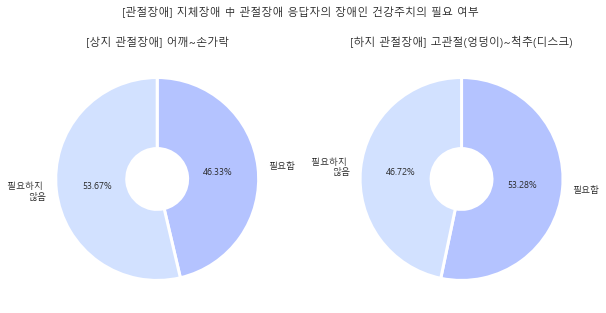

In [171]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(10, 5)

## ax1
ratios = [101, 117]
labels=['필요함', '필요하지 \n않음']
colors = ['#b4c3ff', '#d2e1ff', '#e8f5ff']
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 3}

ax1.pie(ratios, labels = labels, colors=colors, startangle = 90, counterclock=False, wedgeprops=wedgeprops, autopct='%0.2f%%',
       textprops={'fontsize': 9})
ax1.set_title('[상지 관절장애] 어깨~손가락', size=11)

## ax2
ratios = [1087, 953]
labels=['필요함', '필요하지 \n않음']
colors = ['#b4c3ff', '#d2e1ff', '#e8f5ff']
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 3}

ax2.pie(ratios, labels = labels, colors=colors, startangle = 90, counterclock=False, wedgeprops=wedgeprops, autopct='%0.2f%%',
       textprops={'fontsize': 9})
ax2.set_title('[하지 관절장애] 고관절(엉덩이)~척추(디스크)', size=11)


plt.suptitle('[관절장애] 지체장애 中 관절장애 응답자의 장애인 건강주치의 필요 여부', size=11)
# plt.savefig("pyvisual/지체장애/관절장애/[관절장애]지체장애 中 관절장애 응답자의 장애인 건강주치의 필요 여부.png", dpi=300)
plt.show()

### '건강주치의'에게 받는 보건/의료서비스 중 필요하다고 생각하는 것

In [172]:
joint_service = df4.loc[df4['건강주치의 필요']==1][['가장 불편한 부위2', '건강주치의_필요서비스1', '건강주치의_필요서비스2']]
joint_service

,가장 불편한 부위2,건강주치의_필요서비스1,건강주치의_필요서비스2
0,[하지 관절장애]고관절(엉덩이)~척추(디스크),2,3
8,[하지 관절장애]고관절(엉덩이)~척추(디스크),3,2
11,[하지 관절장애]고관절(엉덩이)~척추(디스크),6,2
17,[하지 관절장애]고관절(엉덩이)~척추(디스크),2,3
21,[하지 관절장애]고관절(엉덩이)~척추(디스크),1,2
...,...,...,...
6504,[상지 관절장애]어깨~손가락,6,5
6538,[하지 관절장애]고관절(엉덩이)~척추(디스크),6,3
6542,[하지 관절장애]고관절(엉덩이)~척추(디스크),2,1
6544,[상지 관절장애]어깨~손가락,1,4


#### **상지 관절장애**

In [176]:
high_joint_service_g = joint_service.loc[df4['가장 불편한 부위2']=='[상지 관절장애]어깨~손가락'].groupby(['건강주치의_필요서비스1', '건강주치의_필요서비스2'])[['건강주치의_필요서비스1']].count().add_suffix('_Count').reset_index()
high_joint_service_g.head()

,건강주치의_필요서비스1,건강주치의_필요서비스2,건강주치의_필요서비스1_Count
0,1,0,6
1,1,2,13
2,1,3,5
3,1,4,5
4,1,5,2


In [177]:
high_joint_pivot1 = high_joint_service_g.pivot('건강주치의_필요서비스2', '건강주치의_필요서비스1', '건강주치의_필요서비스1_Count')
high_joint_pivot1.fillna(0, inplace=True)
high_joint_pivot1

건강주치의_필요서비스1,1,2,3,4,5,6
건강주치의_필요서비스2,,,,,,
0,6.0,5.0,2.0,0.0,0.0,0.0
1,0.0,5.0,2.0,0.0,0.0,1.0
2,13.0,0.0,6.0,2.0,1.0,1.0
3,5.0,8.0,0.0,1.0,0.0,1.0
4,5.0,8.0,1.0,0.0,0.0,1.0
5,2.0,0.0,1.0,2.0,0.0,2.0
6,5.0,11.0,3.0,1.0,0.0,0.0


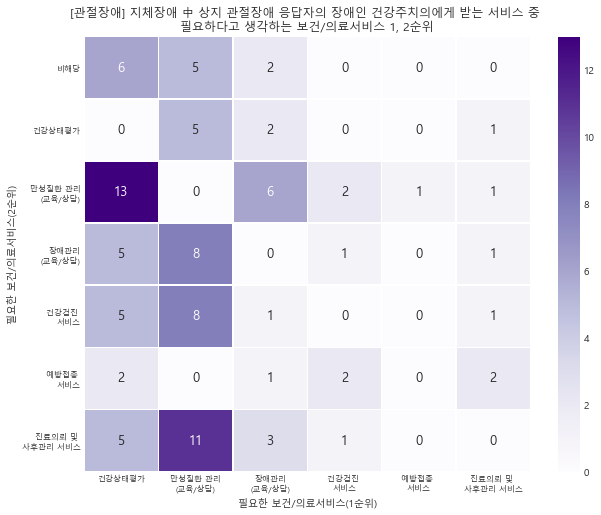

In [179]:
x_axis_labels = ['건강상태평가', '만성질환 관리\n(교육/상담)', '장애관리\n(교육/상담)', 
                 '건강검진 \n서비스', '예방접종 \n서비스', '진료의뢰 및 \n사후관리 서비스'] # 1순위
y_axis_labels = ['비해당', '건강상태평가', '만성질환 관리\n(교육/상담)', '장애관리\n(교육/상담)', 
                 '건강검진 \n서비스', '예방접종 \n서비스', '진료의뢰 및 \n사후관리 서비스'] # 2순위

fig, ax = plt.subplots()
fig.set_size_inches(10, 8)

sns.heatmap(high_joint_pivot1, cbar=True, cmap='Purples', linewidths=0.5, annot=True, annot_kws={"size": 13},
           xticklabels = x_axis_labels, yticklabels=y_axis_labels, fmt = 'g')
ax.set_title("[관절장애] 지체장애 中 상지 관절장애 응답자의 장애인 건강주치의에게 받는 서비스 중 \n필요하다고 생각하는 보건/의료서비스 1, 2순위", size = 12)
ax.tick_params(axis = 'y', labelsize =8, labelrotation = 0)
ax.tick_params(axis = 'x', labelsize =8, labelrotation = 0)
ax.set_xlabel('필요한 보건/의료서비스(1순위)', size = 10)
ax.set_ylabel('필요한 보건/의료서비스(2순위)', size = 10)
# plt.gcf().subplots_adjust(left=0.18)

plt.savefig("pyvisual/지체장애/관절장애/[관절장애]지체장애 中 상지 관절장애 응답자의 장애인 건강주치의에게 받는 서비스 중 필요하다고 생각하는 보건, 의료서비스 1, 2순위.png", dpi=300)
plt.show()

#### **하지 관절장애**

In [184]:
low_joint_service_g = joint_service.loc[df4['가장 불편한 부위2']=='[하지 관절장애]고관절(엉덩이)~척추(디스크)'].groupby(['건강주치의_필요서비스1', '건강주치의_필요서비스2'])[['건강주치의_필요서비스1']].count().add_suffix('_Count').reset_index()
low_joint_service_g.head()

,건강주치의_필요서비스1,건강주치의_필요서비스2,건강주치의_필요서비스1_Count
0,1,0,29
1,1,2,139
2,1,3,52
3,1,4,29
4,1,5,9


In [185]:
low_joint_pivot1 = low_joint_service_g.pivot('건강주치의_필요서비스2', '건강주치의_필요서비스1', '건강주치의_필요서비스1_Count')
low_joint_pivot1.fillna(0, inplace=True)
low_joint_pivot1

건강주치의_필요서비스1,1,2,3,4,5,6
건강주치의_필요서비스2,,,,,,
0,29.0,28.0,18.0,7.0,0.0,11.0
1,0.0,104.0,37.0,8.0,3.0,23.0
2,139.0,0.0,96.0,8.0,2.0,18.0
3,52.0,146.0,0.0,7.0,3.0,18.0
4,29.0,61.0,19.0,0.0,1.0,5.0
5,9.0,16.0,7.0,5.0,0.0,3.0
6,46.0,79.0,39.0,6.0,5.0,0.0


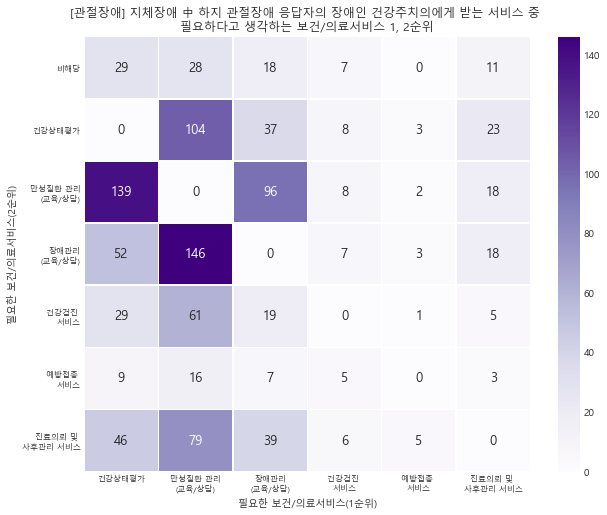

In [212]:
x_axis_labels = ['건강상태평가', '만성질환 관리\n(교육/상담)', '장애관리\n(교육/상담)', 
                 '건강검진 \n서비스', '예방접종 \n서비스', '진료의뢰 및 \n사후관리 서비스'] # 1순위
y_axis_labels = ['비해당', '건강상태평가', '만성질환 관리\n(교육/상담)', '장애관리\n(교육/상담)', 
                 '건강검진 \n서비스', '예방접종 \n서비스', '진료의뢰 및 \n사후관리 서비스'] # 2순위

fig, ax = plt.subplots()
fig.set_size_inches(10, 8)

sns.heatmap(low_joint_pivot1, cbar=True, cmap='Purples', linewidths=0.5, annot=True, annot_kws={"size": 13},
           xticklabels = x_axis_labels, yticklabels=y_axis_labels, fmt = 'g')
ax.set_title("[관절장애] 지체장애 中 하지 관절장애 응답자의 장애인 건강주치의에게 받는 서비스 중 \n필요하다고 생각하는 보건/의료서비스 1, 2순위", size = 12)
ax.tick_params(axis = 'y', labelsize =8, labelrotation = 0)
ax.tick_params(axis = 'x', labelsize =8, labelrotation = 0)
ax.set_xlabel('필요한 보건/의료서비스(1순위)', size = 10)
ax.set_ylabel('필요한 보건/의료서비스(2순위)', size = 10)
# plt.gcf().subplots_adjust(left=0.18)

# plt.savefig("pyvisual/지체장애/관절장애/[관절장애]지체장애 中 하지 관절장애 응답자의 장애인 건강주치의에게 받는 서비스 중 필요하다고 생각하는 보건, 의료서비스 1, 2순위.png", dpi=300)
plt.show()

### 건강주치의가 필요하지 않는 이유

In [187]:
joint_not_need = df4.loc[df4['건강주치의 필요']==2][['가장 불편한 부위2', '건강주치의 불필요한 이유']].value_counts().reset_index()
joint_not_need

,가장 불편한 부위2,건강주치의 불필요한 이유,0
0,[하지 관절장애]고관절(엉덩이)~척추(디스크),1,555
1,[하지 관절장애]고관절(엉덩이)~척추(디스크),3,242
2,[하지 관절장애]고관절(엉덩이)~척추(디스크),2,109
3,[상지 관절장애]어깨~손가락,1,73
4,[하지 관절장애]고관절(엉덩이)~척추(디스크),4,47
5,[상지 관절장애]어깨~손가락,3,20
6,[상지 관절장애]어깨~손가락,2,17
7,[상지 관절장애]어깨~손가락,4,7


#### **상지 관절장애**

In [188]:
high_joint_not_need = joint_not_need.loc[joint_not_need['가장 불편한 부위2']=='[상지 관절장애]어깨~손가락']
high_joint_not_need

,가장 불편한 부위2,건강주치의 불필요한 이유,0
3,[상지 관절장애]어깨~손가락,1,73
5,[상지 관절장애]어깨~손가락,3,20
6,[상지 관절장애]어깨~손가락,2,17
7,[상지 관절장애]어깨~손가락,4,7


In [244]:
high_joint_not_need['pct'] = round(high_joint_not_need[0] / high_joint_not_need[0].sum()*100, 2)
high_joint_not_need

<ipython-input-244-a5b24ee76673>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_joint_not_need['pct'] = round(high_joint_not_need[0] / high_joint_not_need[0].sum()*100, 2)


,가장 불편한 부위2,건강주치의 불필요한 이유,0,pct
3,[상지 관절장애]어깨~손가락,1,73,62.39
5,[상지 관절장애]어깨~손가락,3,20,17.09
6,[상지 관절장애]어깨~손가락,2,17,14.53
7,[상지 관절장애]어깨~손가락,4,7,5.98


In [189]:
col_lst6 = high_joint_not_need['건강주치의 불필요한 이유'].tolist()
col_lst6

[1, 3, 2, 4]

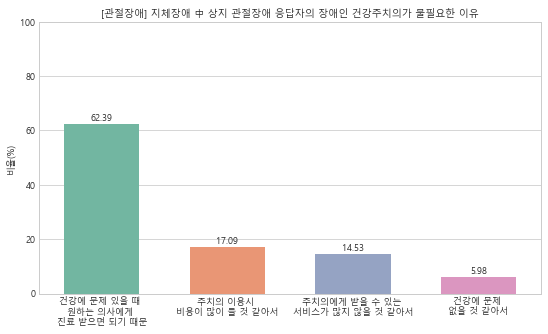

In [245]:
fig, ax = plt.subplots()
fig.set_size_inches(9, 5)

splot = sns.barplot(data = high_joint_not_need, x = '건강주치의 불필요한 이유', y = 'pct', order=col_lst6, palette='Set2')
ax.set_title('[관절장애] 지체장애 中 상지 관절장애 응답자의 장애인 건강주치의가 불필요한 이유', size = 10)
ax.set_xlabel('')
ax.set_ylabel('비율(%)', size = 9)
ax.set_xticklabels(['건강에 문제 있을 때 \n원하는 의사에게 \n진료 받으면 되기 때문', '주치의 이용시 \n비용이 많이 들 것 같아서', 
                    '주치의에게 받을 수 있는 \n서비스가 많지 않을 것 같아서', '건강에 문제 \n없을 것 같아서'], size = 9)
ax.tick_params(axis='both', labelsize = 9) # x축 눈금 크기 조절
ax.set_ylim([0, 100]) # y축 눈금 범위 설정

### 비율(%) 라벨링 하기
for bar in splot.patches: # value label 생성
    ax.annotate("{:0.2f}".format(float(bar.get_height())), # value 값 표시
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=9, xytext=(0, 6),
                   textcoords='offset points')

## seaborn 막대 그래프 너비 설정
def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)

change_width(ax, .6)
    
# plt.savefig("pyvisual/지체장애/관절장애/[관절장애]지체장애 中 상지 관절장애 응답자의 장애인 건강주치의가 불필요한 이유.png", dpi=300)
plt.show()

#### **하지 관절장애**

In [193]:
low_joint_not_need = joint_not_need.loc[joint_not_need['가장 불편한 부위2']=='[하지 관절장애]고관절(엉덩이)~척추(디스크)']
low_joint_not_need

,가장 불편한 부위2,건강주치의 불필요한 이유,0
0,[하지 관절장애]고관절(엉덩이)~척추(디스크),1,555
1,[하지 관절장애]고관절(엉덩이)~척추(디스크),3,242
2,[하지 관절장애]고관절(엉덩이)~척추(디스크),2,109
4,[하지 관절장애]고관절(엉덩이)~척추(디스크),4,47


In [246]:
low_joint_not_need['pct'] = round(low_joint_not_need[0] / low_joint_not_need[0].sum()*100, 2)
low_joint_not_need

<ipython-input-246-1bf752c40c41>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  low_joint_not_need['pct'] = round(low_joint_not_need[0] / low_joint_not_need[0].sum()*100, 2)


,가장 불편한 부위2,건강주치의 불필요한 이유,0,pct
0,[하지 관절장애]고관절(엉덩이)~척추(디스크),1,555,58.24
1,[하지 관절장애]고관절(엉덩이)~척추(디스크),3,242,25.39
2,[하지 관절장애]고관절(엉덩이)~척추(디스크),2,109,11.44
4,[하지 관절장애]고관절(엉덩이)~척추(디스크),4,47,4.93


In [194]:
col_lst7 = low_joint_not_need['건강주치의 불필요한 이유'].tolist()
col_lst7

[1, 3, 2, 4]

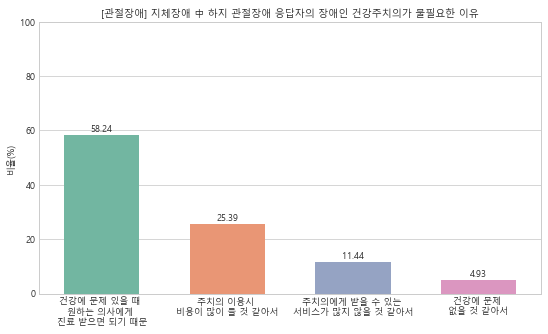

In [247]:
fig, ax = plt.subplots()
fig.set_size_inches(9, 5)

splot = sns.barplot(data = low_joint_not_need, x = '건강주치의 불필요한 이유', y = 'pct', order=col_lst7, palette='Set2')
ax.set_title('[관절장애] 지체장애 中 하지 관절장애 응답자의 장애인 건강주치의가 불필요한 이유', size = 10)
ax.set_xlabel('')
ax.set_ylabel('비율(%)', size = 9)
ax.set_xticklabels(['건강에 문제 있을 때 \n원하는 의사에게 \n진료 받으면 되기 때문', '주치의 이용시 \n비용이 많이 들 것 같아서', 
                    '주치의에게 받을 수 있는 \n서비스가 많지 않을 것 같아서', '건강에 문제 \n없을 것 같아서'], size = 9)
ax.tick_params(axis='both', labelsize = 9) # x축 눈금 크기 조절
ax.set_ylim([0, 100]) # y축 눈금 범위 설정

### 비율(%) 라벨링 하기
for bar in splot.patches: # value label 생성
    ax.annotate("{:0.2f}".format(float(bar.get_height())), # value 값 표시
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=9, xytext=(0, 6),
                   textcoords='offset points')

## seaborn 막대 그래프 너비 설정
def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)

change_width(ax, .6)
    
# plt.savefig("pyvisual/지체장애/관절장애/[관절장애]지체장애 中 하지 관절장애 응답자의 장애인 건강주치의가 불필요한 이유.png", dpi=300)
plt.show()

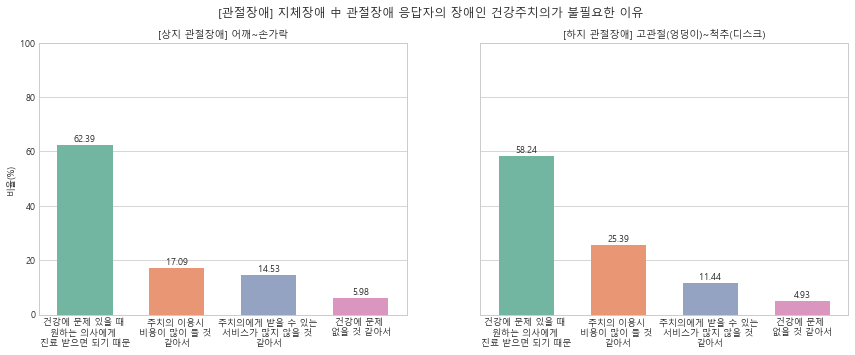

In [248]:
# 통합
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
fig.set_size_inches(14.5, 5)

## ax1
splot1 = sns.barplot(data = high_joint_not_need, x = '건강주치의 불필요한 이유', y = 'pct', order=col_lst6, palette='Set2', ax=ax1)
ax1.set_title('[상지 관절장애] 어깨~손가락', size = 10)
ax1.set_xlabel('')
ax1.set_ylabel('비율(%)', size = 9)
ax1.set_xticklabels(['건강에 문제 있을 때 \n원하는 의사에게 \n진료 받으면 되기 때문', '주치의 이용시 \n비용이 많이 들 것 \n같아서', 
                    '주치의에게 받을 수 있는 \n서비스가 많지 않을 것 \n같아서', '건강에 문제 \n없을 것 같아서'], size = 9)
ax1.tick_params(axis='both', labelsize = 9) # x축 눈금 크기 조절
ax1.set_ylim([0, 100]) # y축 눈금 범위 설정

### 비율(%) 라벨링 하기
for bar in splot1.patches: # value label 생성
    ax1.annotate("{:0.2f}".format(float(bar.get_height())), # value 값 표시
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=9, xytext=(0, 6),
                   textcoords='offset points')

## ax2
splot2 = sns.barplot(data = low_joint_not_need, x = '건강주치의 불필요한 이유', y = 'pct', order=col_lst7, palette='Set2', ax=ax2)
ax2.set_title('[하지 관절장애] 고관절(엉덩이)~척추(디스크)', size = 10)
ax2.set_xlabel('')
ax2.set_ylabel('', size = 9)
ax2.set_xticklabels(['건강에 문제 있을 때 \n원하는 의사에게 \n진료 받으면 되기 때문', '주치의 이용시 \n비용이 많이 들 것 \n같아서', 
                    '주치의에게 받을 수 있는 \n서비스가 많지 않을 것 \n같아서', '건강에 문제 \n없을 것 같아서'], size = 9)
ax2.tick_params(axis='both', labelsize = 9) # x축 눈금 크기 조절
ax2.set_ylim([0, 100]) # y축 눈금 범위 설정

### 비율(%) 라벨링 하기
for bar in splot2.patches: # value label 생성
    ax2.annotate("{:0.2f}".format(float(bar.get_height())), # value 값 표시
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=9, xytext=(0, 6),
                   textcoords='offset points')
    
## seaborn 막대 그래프 너비 설정
def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)

change_width(ax1, .6)
change_width(ax2, .6)

plt.suptitle('[관절장애] 지체장애 中 관절장애 응답자의 장애인 건강주치의가 불필요한 이유')
plt.savefig("pyvisual/지체장애/관절장애/[관절장애]지체장애 中 관절장애 응답자의 장애인 건강주치의가 불필요한 이유.png", dpi=300)
plt.show()

---
## 가장 불편한 부위: 절단
### 건강수준 향상을 위해 정부가 더 강화해야 할 보건의료 및 건강 서비스

In [7]:
cut_force = df2[['가장 불편한 부위2', '정부(사회) 강화할 보건의료서비스1', '정부(사회) 강화할 보건의료서비스2']]
cut_force.head()

,가장 불편한 부위2,정부(사회) 강화할 보건의료서비스1,정부(사회) 강화할 보건의료서비스2
1,"[상지 절단]손목미만(손등, 손가락)~어깨 이상",3,8
16,"[상지 절단]손목미만(손등, 손가락)~어깨 이상",2,1
53,"[상지 절단]손목미만(손등, 손가락)~어깨 이상",2,1
60,"[상지 절단]손목미만(손등, 손가락)~어깨 이상",2,1
75,[하지 절단]양쪽 발가락~엉덩이 이상,3,2


**상지 절단**

In [9]:
high_cut_force=cut_force.loc[cut_force['가장 불편한 부위2']=='[상지 절단]손목미만(손등, 손가락)~어깨 이상']
high_cut_force.head()

,가장 불편한 부위2,정부(사회) 강화할 보건의료서비스1,정부(사회) 강화할 보건의료서비스2
1,"[상지 절단]손목미만(손등, 손가락)~어깨 이상",3,8
16,"[상지 절단]손목미만(손등, 손가락)~어깨 이상",2,1
53,"[상지 절단]손목미만(손등, 손가락)~어깨 이상",2,1
60,"[상지 절단]손목미만(손등, 손가락)~어깨 이상",2,1
102,"[상지 절단]손목미만(손등, 손가락)~어깨 이상",3,2


In [17]:
high_cut_force_g = high_cut_force.groupby(['정부(사회) 강화할 보건의료서비스1', '정부(사회) 강화할 보건의료서비스2'])[['정부(사회) 강화할 보건의료서비스1']].count().add_suffix('_Count').reset_index()
high_cut_force_g.head()

,정부(사회) 강화할 보건의료서비스1,정부(사회) 강화할 보건의료서비스2,정부(사회) 강화할 보건의료서비스1_Count
0,1,0,10
1,1,2,38
2,1,3,23
3,1,4,10
4,1,5,5


In [19]:
high_cut_pivot_df = high_cut_force_g.pivot('정부(사회) 강화할 보건의료서비스2', '정부(사회) 강화할 보건의료서비스1', '정부(사회) 강화할 보건의료서비스1_Count')
high_cut_pivot_df.fillna(0, inplace=True)
# high_cut_pivot_df.astype('int')
high_cut_pivot_df

정부(사회) 강화할 보건의료서비스1,1,2,3,4,5,6,7,8,9
정부(사회) 강화할 보건의료서비스2,,,,,,,,,
0,10.0,6.0,9.0,0.0,0.0,1.0,2.0,2.0,1.0
1,0.0,18.0,11.0,6.0,1.0,1.0,2.0,4.0,0.0
2,38.0,0.0,26.0,6.0,0.0,1.0,3.0,1.0,1.0
3,23.0,33.0,0.0,0.0,1.0,1.0,3.0,1.0,2.0
4,10.0,14.0,8.0,0.0,2.0,0.0,2.0,3.0,0.0
5,5.0,7.0,5.0,7.0,0.0,2.0,0.0,1.0,0.0
6,2.0,2.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
7,12.0,18.0,6.0,5.0,1.0,1.0,0.0,0.0,0.0
8,1.0,4.0,2.0,2.0,1.0,0.0,5.0,0.0,0.0


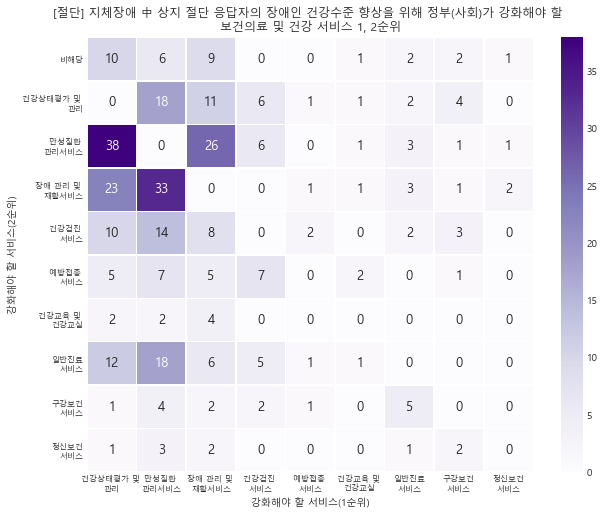

In [21]:
x_axis_labels = ['건강상태평가 및 \n관리', '만성질환 \n관리서비스', '장애 관리 및 \n재활서비스', '건강검진 \n서비스', '예방접종 \n서비스',
                '건강교육 및 \n건강교실', '일반진료\n서비스', '구강보건\n서비스', '정신보건\n서비스'] # 1순위
y_axis_labels = ['비해당', '건강상태평가 및 \n관리', '만성질환 \n관리서비스', '장애 관리 및 \n재활서비스', '건강검진 \n서비스', '예방접종 \n서비스',
                '건강교육 및 \n건강교실', '일반진료\n서비스', '구강보건\n서비스', '정신보건\n서비스'] # 2순위

fig, ax = plt.subplots()
fig.set_size_inches(10, 8)

sns.heatmap(high_cut_pivot_df, cbar=True, cmap='Purples', linewidths=0.5, annot=True, annot_kws={"size": 13},
           xticklabels = x_axis_labels, yticklabels=y_axis_labels, fmt = 'g')
ax.set_title("[절단] 지체장애 中 상지 절단 응답자의 장애인 건강수준 향상을 위해 정부(사회)가 강화해야 할 \n보건의료 및 건강 서비스 1, 2순위", size = 12)
ax.tick_params(axis = 'y', labelsize =8, labelrotation = 0)
ax.tick_params(axis = 'x', labelsize =8, labelrotation = 0)
ax.set_xlabel('강화해야 할 서비스(1순위)', size = 10)
ax.set_ylabel('강화해야 할 서비스(2순위)', size = 10)
# plt.gcf().subplots_adjust(left=0.18)

# plt.savefig("pyvisual/지체장애/절단/[절단]지체장애 中 상지 절단 응답자의 장애인 건강수준 향상을 위해 정부(사회)가 강화해야 할 보건의료 및 건강 서비스 1, 2순위.png", dpi=300)
plt.show()

**하지 절단**

In [13]:
low_cut_force=cut_force.loc[cut_force['가장 불편한 부위2']=='[하지 절단]양쪽 발가락~엉덩이 이상']
low_cut_force.head()

,가장 불편한 부위2,정부(사회) 강화할 보건의료서비스1,정부(사회) 강화할 보건의료서비스2
75,[하지 절단]양쪽 발가락~엉덩이 이상,3,2
219,[하지 절단]양쪽 발가락~엉덩이 이상,7,3
470,[하지 절단]양쪽 발가락~엉덩이 이상,1,3
549,[하지 절단]양쪽 발가락~엉덩이 이상,2,3
672,[하지 절단]양쪽 발가락~엉덩이 이상,3,1


In [16]:
low_cut_force_g = low_cut_force.groupby(['정부(사회) 강화할 보건의료서비스1', '정부(사회) 강화할 보건의료서비스2'])[['정부(사회) 강화할 보건의료서비스1']].count().add_suffix('_Count').reset_index()
low_cut_force_g.head()

,정부(사회) 강화할 보건의료서비스1,정부(사회) 강화할 보건의료서비스2,정부(사회) 강화할 보건의료서비스1_Count
0,1,0,3
1,1,2,6
2,1,3,3
3,1,4,1
4,1,6,1


In [22]:
low_cut_pivot_df = low_cut_force_g.pivot('정부(사회) 강화할 보건의료서비스2', '정부(사회) 강화할 보건의료서비스1', '정부(사회) 강화할 보건의료서비스1_Count')
low_cut_pivot_df.fillna(0, inplace=True)
# high_cut_pivot_df.astype('int')
low_cut_pivot_df

정부(사회) 강화할 보건의료서비스1,1,2,3,4,5,6,7,8,9
정부(사회) 강화할 보건의료서비스2,,,,,,,,,
0,3.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,2.0,7.0,0.0,0.0,1.0,0.0,0.0,0.0
2,6.0,0.0,15.0,1.0,0.0,0.0,0.0,1.0,0.0
3,3.0,9.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0
4,1.0,5.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0
5,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0
6,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,1.0,1.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0
8,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


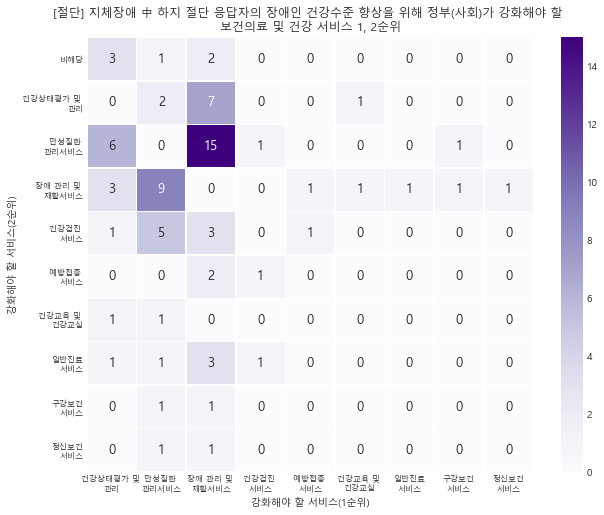

In [23]:
x_axis_labels = ['건강상태평가 및 \n관리', '만성질환 \n관리서비스', '장애 관리 및 \n재활서비스', '건강검진 \n서비스', '예방접종 \n서비스',
                '건강교육 및 \n건강교실', '일반진료\n서비스', '구강보건\n서비스', '정신보건\n서비스'] # 1순위
y_axis_labels = ['비해당', '건강상태평가 및 \n관리', '만성질환 \n관리서비스', '장애 관리 및 \n재활서비스', '건강검진 \n서비스', '예방접종 \n서비스',
                '건강교육 및 \n건강교실', '일반진료\n서비스', '구강보건\n서비스', '정신보건\n서비스'] # 2순위

fig, ax = plt.subplots()
fig.set_size_inches(10, 8)

sns.heatmap(low_cut_pivot_df, cbar=True, cmap='Purples', linewidths=0.5, annot=True, annot_kws={"size": 13},
           xticklabels = x_axis_labels, yticklabels=y_axis_labels, fmt = 'g')
ax.set_title("[절단] 지체장애 中 하지 절단 응답자의 장애인 건강수준 향상을 위해 정부(사회)가 강화해야 할 \n보건의료 및 건강 서비스 1, 2순위", size = 12)
ax.tick_params(axis = 'y', labelsize =8, labelrotation = 0)
ax.tick_params(axis = 'x', labelsize =8, labelrotation = 0)
ax.set_xlabel('강화해야 할 서비스(1순위)', size = 10)
ax.set_ylabel('강화해야 할 서비스(2순위)', size = 10)
# plt.gcf().subplots_adjust(left=0.18)

# plt.savefig("pyvisual/지체장애/절단/[절단]지체장애 中 하지 절단 응답자의 장애인 건강수준 향상을 위해 정부(사회)가 강화해야 할 보건의료 및 건강 서비스 1, 2순위.png", dpi=300)
plt.show()

---
## 가장 불편한 부위: 마비
### 건강수준 향상을 위해 정부가 더 강화해야 할 보건의료 및 건강 서비스

In [31]:
paralysis_force = df3[['가장 불편한 부위2', '정부(사회) 강화할 보건의료서비스1', '정부(사회) 강화할 보건의료서비스2']]
paralysis_force.head()

,가장 불편한 부위2,정부(사회) 강화할 보건의료서비스1,정부(사회) 강화할 보건의료서비스2
34,[하지 마비]하지 한쪽 or 양쪽,3,1
39,[하지 마비]하지 한쪽 or 양쪽,3,2
44,[하지 마비]하지 한쪽 or 양쪽,1,4
57,[상하지 마비]상하지 한쪽 or 양쪽 or 전신마비,3,6
79,[상지 마비]상지 한쪽 or 양쪽,3,2


**상지 마비**

In [27]:
high_paralysis_force = paralysis_force.loc[paralysis_force['가장 불편한 부위2']=='[상지 마비]상지 한쪽 or 양쪽']
high_paralysis_force.head()

,가장 불편한 부위2,정부(사회) 강화할 보건의료서비스1,정부(사회) 강화할 보건의료서비스2
79,[상지 마비]상지 한쪽 or 양쪽,3,2
107,[상지 마비]상지 한쪽 or 양쪽,2,3
184,[상지 마비]상지 한쪽 or 양쪽,4,2
209,[상지 마비]상지 한쪽 or 양쪽,3,7
253,[상지 마비]상지 한쪽 or 양쪽,7,1


In [28]:
high_paralysis_force_g = high_paralysis_force.groupby(['정부(사회) 강화할 보건의료서비스1', '정부(사회) 강화할 보건의료서비스2'])[['정부(사회) 강화할 보건의료서비스1']].count().add_suffix('_Count').reset_index()
high_paralysis_force_g.head()

,정부(사회) 강화할 보건의료서비스1,정부(사회) 강화할 보건의료서비스2,정부(사회) 강화할 보건의료서비스1_Count
0,1,0,2
1,1,2,5
2,1,3,6
3,1,4,1
4,1,6,3


In [29]:
high_paralysis_pivot_df = high_paralysis_force_g.pivot('정부(사회) 강화할 보건의료서비스2', '정부(사회) 강화할 보건의료서비스1', '정부(사회) 강화할 보건의료서비스1_Count')
high_paralysis_pivot_df.fillna(0, inplace=True)
# high_paralysis_pivot_df.astype('int')
high_paralysis_pivot_df

정부(사회) 강화할 보건의료서비스1,1,2,3,4,5,6,7,8,9
정부(사회) 강화할 보건의료서비스2,,,,,,,,,
0,2.0,1.0,4.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,5.0,4.0,1.0,0.0,0.0,2.0,0.0,0.0
2,5.0,0.0,9.0,1.0,0.0,0.0,0.0,0.0,1.0
3,6.0,8.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
4,1.0,0.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0
5,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
6,3.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
7,0.0,4.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


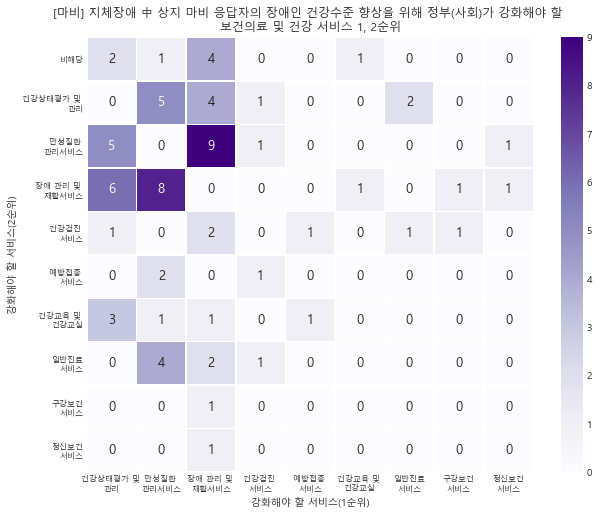

In [32]:
x_axis_labels = ['건강상태평가 및 \n관리', '만성질환 \n관리서비스', '장애 관리 및 \n재활서비스', '건강검진 \n서비스', '예방접종 \n서비스',
                '건강교육 및 \n건강교실', '일반진료\n서비스', '구강보건\n서비스', '정신보건\n서비스'] # 1순위
y_axis_labels = ['비해당', '건강상태평가 및 \n관리', '만성질환 \n관리서비스', '장애 관리 및 \n재활서비스', '건강검진 \n서비스', '예방접종 \n서비스',
                '건강교육 및 \n건강교실', '일반진료\n서비스', '구강보건\n서비스', '정신보건\n서비스'] # 2순위

fig, ax = plt.subplots()
fig.set_size_inches(10, 8)

sns.heatmap(high_paralysis_pivot_df, cbar=True, cmap='Purples', linewidths=0.5, annot=True, annot_kws={"size": 13},
           xticklabels = x_axis_labels, yticklabels=y_axis_labels, fmt = 'g')
ax.set_title("[마비] 지체장애 中 상지 마비 응답자의 장애인 건강수준 향상을 위해 정부(사회)가 강화해야 할 \n보건의료 및 건강 서비스 1, 2순위", size = 12)
ax.tick_params(axis = 'y', labelsize =8, labelrotation = 0)
ax.tick_params(axis = 'x', labelsize =8, labelrotation = 0)
ax.set_xlabel('강화해야 할 서비스(1순위)', size = 10)
ax.set_ylabel('강화해야 할 서비스(2순위)', size = 10)
# plt.gcf().subplots_adjust(left=0.18)

# plt.savefig("pyvisual/지체장애/마비/[마비]지체장애 中 상지 마비 응답자의 장애인 건강수준 향상을 위해 정부(사회)가 강화해야 할 보건의료 및 건강 서비스 1, 2순위.png", dpi=300)
plt.show()

**상하지 마비**

In [34]:
med_paralysis_force = paralysis_force.loc[paralysis_force['가장 불편한 부위2']=='[상하지 마비]상하지 한쪽 or 양쪽 or 전신마비']
med_paralysis_force.head()

,가장 불편한 부위2,정부(사회) 강화할 보건의료서비스1,정부(사회) 강화할 보건의료서비스2
57,[상하지 마비]상하지 한쪽 or 양쪽 or 전신마비,3,6
387,[상하지 마비]상하지 한쪽 or 양쪽 or 전신마비,2,7
429,[상하지 마비]상하지 한쪽 or 양쪽 or 전신마비,3,2
554,[상하지 마비]상하지 한쪽 or 양쪽 or 전신마비,1,3
695,[상하지 마비]상하지 한쪽 or 양쪽 or 전신마비,4,3


In [39]:
med_paralysis_force_g = med_paralysis_force.groupby(['정부(사회) 강화할 보건의료서비스1', '정부(사회) 강화할 보건의료서비스2'])[['정부(사회) 강화할 보건의료서비스1']].count().add_suffix('_Count').reset_index()
med_paralysis_force_g.head()

,정부(사회) 강화할 보건의료서비스1,정부(사회) 강화할 보건의료서비스2,정부(사회) 강화할 보건의료서비스1_Count
0,1,2,6
1,1,3,5
2,1,4,4
3,1,7,1
4,1,9,1


In [37]:
med_paralysis_pivot_df = med_paralysis_force_g.pivot('정부(사회) 강화할 보건의료서비스2', '정부(사회) 강화할 보건의료서비스1', '정부(사회) 강화할 보건의료서비스1_Count')
med_paralysis_pivot_df.fillna(0, inplace=True)
# med_paralysis_pivot_df.astype('int')
med_paralysis_pivot_df

정부(사회) 강화할 보건의료서비스1,1,2,3,4,5
정부(사회) 강화할 보건의료서비스2,,,,,
0,0.0,1.0,1.0,0.0,0.0
1,0.0,4.0,8.0,1.0,0.0
2,6.0,0.0,4.0,0.0,0.0
3,5.0,5.0,0.0,2.0,0.0
4,4.0,0.0,1.0,0.0,1.0
5,0.0,0.0,5.0,0.0,0.0
6,0.0,0.0,1.0,0.0,0.0
7,1.0,2.0,3.0,0.0,0.0
8,0.0,0.0,1.0,0.0,0.0


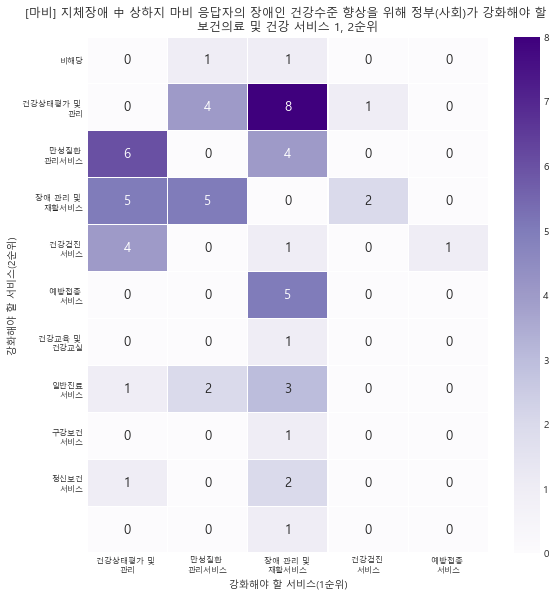

In [49]:
x_axis_labels = ['건강상태평가 및 \n관리', '만성질환 \n관리서비스', '장애 관리 및 \n재활서비스', '건강검진 \n서비스', '예방접종 \n서비스'] # 1순위
y_axis_labels = ['비해당', '건강상태평가 및 \n관리', '만성질환 \n관리서비스', '장애 관리 및 \n재활서비스', '건강검진 \n서비스', '예방접종 \n서비스',
                '건강교육 및 \n건강교실', '일반진료\n서비스', '구강보건\n서비스', '정신보건\n서비스'] # 2순위

fig, ax = plt.subplots()
fig.set_size_inches(9, 9.5)

sns.heatmap(med_paralysis_pivot_df, cbar=True, cmap='Purples', linewidths=0.5, annot=True, annot_kws={"size": 13},
           xticklabels = x_axis_labels, yticklabels=y_axis_labels, fmt = 'g')
ax.set_title("[마비] 지체장애 中 상하지 마비 응답자의 장애인 건강수준 향상을 위해 정부(사회)가 강화해야 할 \n보건의료 및 건강 서비스 1, 2순위", size = 12)
ax.tick_params(axis = 'y', labelsize =8, labelrotation = 0)
ax.tick_params(axis = 'x', labelsize =8, labelrotation = 0)
ax.set_xlabel('강화해야 할 서비스(1순위)', size = 10)
ax.set_ylabel('강화해야 할 서비스(2순위)', size = 10)
# plt.gcf().subplots_adjust(left=0.18)

# plt.savefig("pyvisual/지체장애/마비/[마비]지체장애 中 상하지 마비 응답자의 장애인 건강수준 향상을 위해 정부(사회)가 강화해야 할 보건의료 및 건강 서비스 1, 2순위.png", dpi=300)
plt.show()

**하지 마비**

In [52]:
low_paralysis_force=paralysis_force.loc[paralysis_force['가장 불편한 부위2']=='[하지 마비]하지 한쪽 or 양쪽']
low_paralysis_force.head()

,가장 불편한 부위2,정부(사회) 강화할 보건의료서비스1,정부(사회) 강화할 보건의료서비스2
34,[하지 마비]하지 한쪽 or 양쪽,3,1
39,[하지 마비]하지 한쪽 or 양쪽,3,2
44,[하지 마비]하지 한쪽 or 양쪽,1,4
114,[하지 마비]하지 한쪽 or 양쪽,3,1
116,[하지 마비]하지 한쪽 or 양쪽,3,1


In [53]:
low_paralysis_force_g = low_paralysis_force.groupby(['정부(사회) 강화할 보건의료서비스1', '정부(사회) 강화할 보건의료서비스2'])[['정부(사회) 강화할 보건의료서비스1']].count().add_suffix('_Count').reset_index()
low_paralysis_force_g.head()

,정부(사회) 강화할 보건의료서비스1,정부(사회) 강화할 보건의료서비스2,정부(사회) 강화할 보건의료서비스1_Count
0,1,0,8
1,1,2,23
2,1,3,22
3,1,4,8
4,1,5,2


In [54]:
low_paralysis_pivot_df = low_paralysis_force_g.pivot('정부(사회) 강화할 보건의료서비스2', '정부(사회) 강화할 보건의료서비스1', '정부(사회) 강화할 보건의료서비스1_Count')
low_paralysis_pivot_df.fillna(0, inplace=True)
# low_paralysis_pivot_df.astype('int')
low_paralysis_pivot_df

정부(사회) 강화할 보건의료서비스1,1,2,3,4,5,6,7,8,9
정부(사회) 강화할 보건의료서비스2,,,,,,,,,
0,8.0,3.0,14.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.0,17.0,29.0,0.0,2.0,0.0,0.0,0.0,0.0
2,23.0,0.0,33.0,4.0,1.0,0.0,2.0,1.0,0.0
3,22.0,28.0,0.0,1.0,2.0,0.0,2.0,2.0,0.0
4,8.0,4.0,11.0,0.0,1.0,0.0,2.0,0.0,0.0
5,2.0,1.0,5.0,3.0,0.0,0.0,0.0,0.0,0.0
6,4.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
7,4.0,3.0,9.0,2.0,1.0,0.0,0.0,0.0,0.0
8,0.0,5.0,6.0,1.0,0.0,1.0,0.0,0.0,1.0


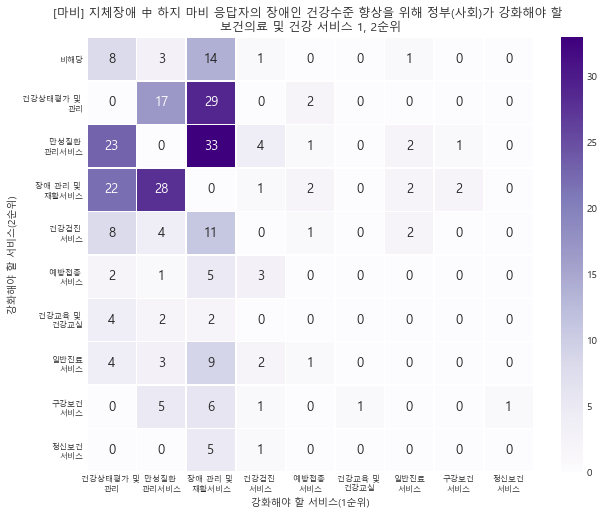

In [56]:
x_axis_labels = ['건강상태평가 및 \n관리', '만성질환 \n관리서비스', '장애 관리 및 \n재활서비스', '건강검진 \n서비스', '예방접종 \n서비스',
                '건강교육 및 \n건강교실', '일반진료\n서비스', '구강보건\n서비스', '정신보건\n서비스'] # 1순위
y_axis_labels = ['비해당', '건강상태평가 및 \n관리', '만성질환 \n관리서비스', '장애 관리 및 \n재활서비스', '건강검진 \n서비스', '예방접종 \n서비스',
                '건강교육 및 \n건강교실', '일반진료\n서비스', '구강보건\n서비스', '정신보건\n서비스'] # 2순위

fig, ax = plt.subplots()
fig.set_size_inches(10, 8)

sns.heatmap(low_paralysis_pivot_df, cbar=True, cmap='Purples', linewidths=0.5, annot=True, annot_kws={"size": 13},
           xticklabels = x_axis_labels, yticklabels=y_axis_labels, fmt = 'g')
ax.set_title("[마비] 지체장애 中 하지 마비 응답자의 장애인 건강수준 향상을 위해 정부(사회)가 강화해야 할 \n보건의료 및 건강 서비스 1, 2순위", size = 12)
ax.tick_params(axis = 'y', labelsize =8, labelrotation = 0)
ax.tick_params(axis = 'x', labelsize =8, labelrotation = 0)
ax.set_xlabel('강화해야 할 서비스(1순위)', size = 10)
ax.set_ylabel('강화해야 할 서비스(2순위)', size = 10)
# plt.gcf().subplots_adjust(left=0.18)

# plt.savefig("pyvisual/지체장애/마비/[마비]지체장애 中 하지 마비 응답자의 장애인 건강수준 향상을 위해 정부(사회)가 강화해야 할 보건의료 및 건강 서비스 1, 2순위.png", dpi=300)
plt.show()

---
## 가장 불편한 부위: 관절장애
### 건강수준 향상을 위해 정부가 더 강화해야 할 보건의료 및 건강 서비스

In [59]:
joint_force = df4[['가장 불편한 부위2', '정부(사회) 강화할 보건의료서비스1', '정부(사회) 강화할 보건의료서비스2']]
joint_force.head()

,가장 불편한 부위2,정부(사회) 강화할 보건의료서비스1,정부(사회) 강화할 보건의료서비스2
0,[하지 관절장애]고관절(엉덩이)~척추(디스크),3,2
2,[하지 관절장애]고관절(엉덩이)~척추(디스크),3,8
3,[하지 관절장애]고관절(엉덩이)~척추(디스크),3,8
8,[하지 관절장애]고관절(엉덩이)~척추(디스크),3,2
11,[하지 관절장애]고관절(엉덩이)~척추(디스크),3,2


**상지 관절장애**

In [60]:
high_joint_force=joint_force.loc[joint_force['가장 불편한 부위2']=='[상지 관절장애]어깨~손가락']
high_joint_force.head()

,가장 불편한 부위2,정부(사회) 강화할 보건의료서비스1,정부(사회) 강화할 보건의료서비스2
267,[상지 관절장애]어깨~손가락,1,7
346,[상지 관절장애]어깨~손가락,1,0
363,[상지 관절장애]어깨~손가락,3,0
395,[상지 관절장애]어깨~손가락,2,4
427,[상지 관절장애]어깨~손가락,3,9


In [61]:
high_joint_force_g = high_joint_force.groupby(['정부(사회) 강화할 보건의료서비스1', '정부(사회) 강화할 보건의료서비스2'])[['정부(사회) 강화할 보건의료서비스1']].count().add_suffix('_Count').reset_index()
high_joint_force_g.head()

,정부(사회) 강화할 보건의료서비스1,정부(사회) 강화할 보건의료서비스2,정부(사회) 강화할 보건의료서비스1_Count
0,1,0,5
1,1,2,20
2,1,3,10
3,1,4,5
4,1,5,3


In [62]:
high_joint_pivot_df = high_joint_force_g.pivot('정부(사회) 강화할 보건의료서비스2', '정부(사회) 강화할 보건의료서비스1', '정부(사회) 강화할 보건의료서비스1_Count')
high_joint_pivot_df.fillna(0, inplace=True)
# high_joint_pivot_df.astype('int')
high_joint_pivot_df

정부(사회) 강화할 보건의료서비스1,1,2,3,4,5,6,7,8
정부(사회) 강화할 보건의료서비스2,,,,,,,,
0,5.0,3.0,3.0,1.0,0.0,1.0,1.0,0.0
1,0.0,18.0,10.0,2.0,0.0,0.0,1.0,0.0
2,20.0,0.0,25.0,3.0,0.0,2.0,3.0,2.0
3,10.0,25.0,0.0,1.0,0.0,0.0,3.0,1.0
4,5.0,4.0,6.0,0.0,2.0,0.0,0.0,0.0
5,3.0,8.0,0.0,3.0,0.0,0.0,0.0,1.0
6,2.0,4.0,2.0,1.0,3.0,0.0,0.0,0.0
7,5.0,7.0,5.0,4.0,0.0,0.0,0.0,0.0
8,3.0,3.0,2.0,0.0,1.0,0.0,1.0,0.0


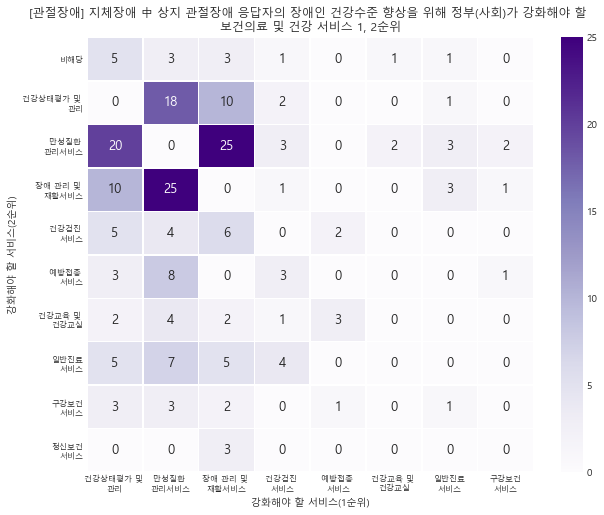

In [63]:
x_axis_labels = ['건강상태평가 및 \n관리', '만성질환 \n관리서비스', '장애 관리 및 \n재활서비스', '건강검진 \n서비스', '예방접종 \n서비스',
                '건강교육 및 \n건강교실', '일반진료\n서비스', '구강보건\n서비스'] # 1순위
y_axis_labels = ['비해당', '건강상태평가 및 \n관리', '만성질환 \n관리서비스', '장애 관리 및 \n재활서비스', '건강검진 \n서비스', '예방접종 \n서비스',
                '건강교육 및 \n건강교실', '일반진료\n서비스', '구강보건\n서비스', '정신보건\n서비스'] # 2순위

fig, ax = plt.subplots()
fig.set_size_inches(10, 8)

sns.heatmap(high_joint_pivot_df, cbar=True, cmap='Purples', linewidths=0.5, annot=True, annot_kws={"size": 13},
           xticklabels = x_axis_labels, yticklabels=y_axis_labels, fmt = 'g')
ax.set_title("[관절장애] 지체장애 中 상지 관절장애 응답자의 장애인 건강수준 향상을 위해 정부(사회)가 강화해야 할 \n보건의료 및 건강 서비스 1, 2순위", size = 12)
ax.tick_params(axis = 'y', labelsize =8, labelrotation = 0)
ax.tick_params(axis = 'x', labelsize =8, labelrotation = 0)
ax.set_xlabel('강화해야 할 서비스(1순위)', size = 10)
ax.set_ylabel('강화해야 할 서비스(2순위)', size = 10)
# plt.gcf().subplots_adjust(left=0.18)

# plt.savefig("pyvisual/지체장애/관절장애/[관절장애]지체장애 中 상지 관절장애 응답자의 장애인 건강수준 향상을 위해 정부(사회)가 강화해야 할 보건의료 및 건강 서비스 1, 2순위.png", dpi=300)
plt.show()

**하지 관절장애**

In [65]:
low_joint_force=joint_force.loc[joint_force['가장 불편한 부위2']=='[하지 관절장애]고관절(엉덩이)~척추(디스크)']
low_joint_force.head()

,가장 불편한 부위2,정부(사회) 강화할 보건의료서비스1,정부(사회) 강화할 보건의료서비스2
0,[하지 관절장애]고관절(엉덩이)~척추(디스크),3,2
2,[하지 관절장애]고관절(엉덩이)~척추(디스크),3,8
3,[하지 관절장애]고관절(엉덩이)~척추(디스크),3,8
8,[하지 관절장애]고관절(엉덩이)~척추(디스크),3,2
11,[하지 관절장애]고관절(엉덩이)~척추(디스크),3,2


In [66]:
low_joint_force_g = low_joint_force.groupby(['정부(사회) 강화할 보건의료서비스1', '정부(사회) 강화할 보건의료서비스2'])[['정부(사회) 강화할 보건의료서비스1']].count().add_suffix('_Count').reset_index()
low_joint_force_g.head()

,정부(사회) 강화할 보건의료서비스1,정부(사회) 강화할 보건의료서비스2,정부(사회) 강화할 보건의료서비스1_Count
0,1,0,37
1,1,2,190
2,1,3,123
3,1,4,23
4,1,5,15


In [67]:
low_joint_pivot_df = low_joint_force_g.pivot('정부(사회) 강화할 보건의료서비스2', '정부(사회) 강화할 보건의료서비스1', '정부(사회) 강화할 보건의료서비스1_Count')
low_joint_pivot_df.fillna(0, inplace=True)
# low_joint_pivot_df.astype('int')
low_joint_pivot_df

정부(사회) 강화할 보건의료서비스1,1,2,3,4,5,6,7,8,9
정부(사회) 강화할 보건의료서비스2,,,,,,,,,
0,37.0,18.0,44.0,17.0,6.0,5.0,6.0,3.0,0.0
1,0.0,119.0,103.0,14.0,6.0,7.0,11.0,5.0,2.0
2,190.0,0.0,239.0,23.0,8.0,8.0,20.0,7.0,2.0
3,123.0,257.0,0.0,13.0,5.0,4.0,16.0,12.0,1.0
4,23.0,88.0,46.0,0.0,7.0,2.0,14.0,7.0,0.0
5,15.0,39.0,23.0,33.0,0.0,1.0,6.0,4.0,0.0
6,20.0,22.0,19.0,6.0,1.0,0.0,3.0,1.0,2.0
7,33.0,90.0,46.0,24.0,6.0,1.0,0.0,6.0,0.0
8,7.0,37.0,21.0,7.0,2.0,3.0,6.0,0.0,0.0


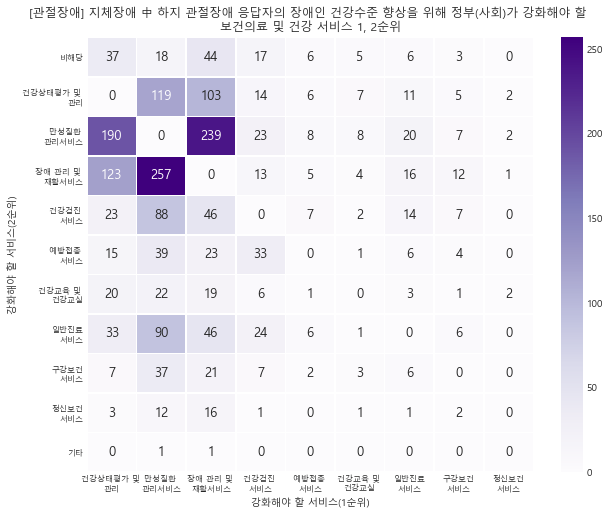

In [69]:
x_axis_labels = ['건강상태평가 및 \n관리', '만성질환 \n관리서비스', '장애 관리 및 \n재활서비스', '건강검진 \n서비스', '예방접종 \n서비스',
                '건강교육 및 \n건강교실', '일반진료\n서비스', '구강보건\n서비스', '정신보건\n서비스'] # 1순위
y_axis_labels = ['비해당', '건강상태평가 및 \n관리', '만성질환 \n관리서비스', '장애 관리 및 \n재활서비스', '건강검진 \n서비스', '예방접종 \n서비스',
                '건강교육 및 \n건강교실', '일반진료\n서비스', '구강보건\n서비스', '정신보건\n서비스', '기타'] # 2순위

fig, ax = plt.subplots()
fig.set_size_inches(10, 8)

sns.heatmap(low_joint_pivot_df, cbar=True, cmap='Purples', linewidths=0.5, annot=True, annot_kws={"size": 13},
           xticklabels = x_axis_labels, yticklabels=y_axis_labels, fmt = 'g')
ax.set_title("[관절장애] 지체장애 中 하지 관절장애 응답자의 장애인 건강수준 향상을 위해 정부(사회)가 강화해야 할 \n보건의료 및 건강 서비스 1, 2순위", size = 12)
ax.tick_params(axis = 'y', labelsize =8, labelrotation = 0)
ax.tick_params(axis = 'x', labelsize =8, labelrotation = 0)
ax.set_xlabel('강화해야 할 서비스(1순위)', size = 10)
ax.set_ylabel('강화해야 할 서비스(2순위)', size = 10)
# plt.gcf().subplots_adjust(left=0.18)

# plt.savefig("pyvisual/지체장애/관절장애/[관절장애]지체장애 中 하지 관절장애 응답자의 장애인 건강수준 향상을 위해 정부(사회)가 강화해야 할 보건의료 및 건강 서비스 1, 2순위.png", dpi=300)
plt.show()